<h1 style="display: flex; align-items: center; font-size: 50px; margin-bottom: 25px;">
  Anàlisi de la Petjada Hídrica dels Turistes a Barcelona
</h1>
<hr style="border: 1px solid grey;">
<img src="display/media/logos_report.png" alt="Image 1">
<hr style="border: 1px solid grey;">

**Abans d'executar aquest notebook, assegura't que les carpetes segueixin la disposició indicada al README i crea una carpeta dins de data que es digui local_data, on hi guardis el daily_dataset proporcionat per AGBAR.**

# Índex

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Índex</title>
    <style>
        h1 {
            color:"white" ;
        }
        ul {
            list-style-type: none;
            padding-left: 0;
        }
        li {
            padding: 3px 0;
        }
        li a {
            text-decoration: none;
            color: white;
            font-size: 14px;
            font-weight: bold;
            transition: color 0.3s;
        }
        li a:hover {
            color: grey;
        }
        .sub-index {
            margin-left: 20px;
            margin-top: 2px;
            font-size: 10px;
        }
        .sub-index a {
            color: lightgrey;
        }
    </style>
</head>
<ul>
    <li><a href="#s1">1. Introducció</a>
        <ul class="sub-index">
            <li><a href="#s11">1.1 Introducció al challenge</a></li>
            <li><a href="#s12">1.2 Presentació del grup</a></li>
            <li><a href="#s13">1.3 Presentació de la idea</a></li>
        </ul>
    </li>
    <li><a href="#s2">2. Tractament de dades</a>
        <ul class="sub-index">
            <li><a href="#s21">2.1 Dades Requerides</a></li>
            <li><a href="#s22">2.2 Preprocessing</a></li>
            <li><a href="#s23">2.3 Obtenció de les dades meteorològiques i de precipitacions</a></li>
            <li><a href="#s24">2.4 Obtenció de les dades de turisme</a></li>
            <li><a href="#s25">2.5 Obtenció de les dades dels habitants de Barcelona</a></li>
            <li><a href="#s26">2.6 Correlació de les dades</a></li>
        </ul>
    </li>
    <li><a href="#s3">3. Creació de l'algorisme de predicció</a>
        <ul class="sub-index">
            <li><a href="#s31">3.1 Investigació prèvia</a></li>
            <li><a href="#s32">3.2 Descripció de inputs i outputs</a></li>
            <li><a href="#s33">3.3 Explicació del algoritme</a></li>
        </ul>
    </li>
    <li><a href="#s4">4. Validació de l'algorisme de predicció</a>
        <ul class="sub-index">
            <li><a href="#s41">4.1 Estudi de performance</a></li>
            <li><a href="#s42">4.2 Exemple del output</a></li>
        </ul>
    </li>
    <li><a href="#s5">5. Simulació</a>
        <ul class="sub-index">
            <li><a href="#s51">5.1 Explicació de l'objectiu de la simulació</a></li>
            <li><a href="#s52">5.2 Instruccions per córrer la simulació</a></li>
            <li><a href="#s53">5.3 Descripció de les pàgines de la simulació</a></li>
        </ul>
    </li>
    <li><a href="#s6">6. Recomanacions accionables</a>
        <ul class="sub-index">
            <li><a href="#s61">6.1 Integrar model predictiu en operacions dinàmiques de gestió de l’aigua</a></li>
            <li><a href="#s62">6.2 Proves What-If per a la Gestió Proactiva de l’Aigua i la Planificació Estratègica</a></li>
            <li><a href="#s63">6.3 Aplicacions Específiques per a la Gestió a Nivell de Districte</a></li>
            <li><a href="#s64">6.4 Millorar la Integració del Model Predictiu</a></li>
        </ul>
    </li>
    <li><a href="#s7">7. (Extra) Vector AutoRegression Model (VAR)</a>
        <ul class="sub-index">
            <li><a href="#s71">7.1 Explicació del Model</a></li>
            <li><a href="#s72">7.2 Evaluació del Model</a></li>
            <li><a href="#s73">7.3 Limitacions</a></li>
            <li><a href="#s74">7.4 Potencial VAR per a Futures Aplicacions i Adaptacions</a></li>
            <li><a href="#s73">7.5 VAR Codi</a></li>
            <li><a href="#s73">7.6 VAR Codi Exemple</a></li>
        </ul>
    </li>
    <li><a href="#s8">8. Escalabilitat</a>
        <ul class="sub-index">
            <li><a href="#s81">8.1 Dades meteorològiques i precipitacions</a></li>
            <li><a href="#s82">8.2 Dades de turisme</a></li>
            <li><a href="#s83">8.3 Dades de població</a></li>
            <li><a href="#s84">8.4 Re-entrenament del model</a></li>
        </ul>
    </li>
    <li><a href="#s9">9. Conclusions</a>
        <ul class="sub-index">
            <li><a href="#s91">9.1 Efecte del turisme a Barcelona</a></li>
            <li><a href="#s92">9.2 Tancament del projecte</a></li>
        </ul>
    </li>
</ul>


<a id="s1"></a>
## 1. Introducció

<a id="s11"></a>
### 1.1 Introducció al challenge

El **AB Data Challenge** és una iniciativa d’Aigües de Barcelona (AGBAR) que, amb el suport d’universitats, centres de recerca i l’ecosistema d’innovació de Catalunya, busca fomentar la creativitat i la innovació mitjançant l'ús de les dades recopilades del servei de telelectura dels comptadors d’aigua. Aquesta iniciativa té com a objectiu generar solucions que millorin la gestió de l’aigua i promoguin la sostenibilitat, amb especial èmfasi en la reducció de l’impacte ambiental derivat del consum d’aigua.

En aquest context, el nostre grup ha decidit abordar el repte relacionat amb la **Sostenibilitat Hídrica Territorial**, amb un focus particular en el **turisme**, un dels factors que exerceix una gran pressió sobre els recursos hídrics de Barcelona. La creixent demanda d’aigua, influenciada per l’augment de turistes que visiten la ciutat, presenta un desafiament significatiu per a la gestió dels recursos hídrics urbans. A més, aquest fenomen s’accentua pels efectes del canvi climàtic, com les altes temperatures i les sequera, que augmenten la necessitat de garantir la sostenibilitat del sistema hídrico. 

Hem escollit aquest repte perquè creiem que les dades de telelectura dels comptadors d’aigua proporcionades per AGBAR, combinades amb dades externes com les de turisme, mobilitat i meteorologia, poden oferir una oportunitat única per desenvolupar models predictius que millorin la gestió de l’aigua i afavoreixin l’eficiència en el seu consum. En un context com el de Barcelona, on el turisme és una de les principals fonts de consum d’aigua, és fonamental poder integrar aquestes dades per reduir la pressió sobre els recursos hídrics i fomentar pràctiques més sostenibles en la gestió de l’aigua.

<a id="s12"></a>
### 1.2 Presentació del grup

Som un grup d'estudiants de l'assignatura de Gestió de Projectes, amb membres provinents de dues disciplines: **Enginyeria Matemàtica en Ciències de Dades** i **Enginyeria Informàtica**. Aquesta diversitat de formacions ens permet abordar el repte des de diferents perspectives, combinant coneixements teòrics i pràctics en l'àmbit de la gestió de dades, l'anàlisi estadística i la implementació de solucions tecnològiques. Ens enorgullim d'haver treballat tots en tots els àmbits del projecte, però per facilitar l'organització del projecte hem distribuit carrecs entre nosaltrs.

Els membres del grup i els seus càrrecs són els següents:


<style>
  /* General styles for both rows */
  .team-member {
    width: 25%;
    margin: 10px;
    background-color: #C8C8C8;
    padding: 15px;
    color: black;
    text-align: center;
    border-radius: 10px;
    transition: transform 0.3s ease, box-shadow 0.3s ease;
  }

  .team-member:hover {
    transform: scale(1.1); /* Make the member larger on hover */
    box-shadow: 0px 0px 20px rgba(0, 0, 0, 0.5); /* Add shadow effect */
  }

  /* Styles for the upper row */
  .upper-row .team-member {
    width: 25%;
  }

  /* Styles for the lower row */
  .lower-row .team-member {
    width: 30%;
  }
</style>
<div style="display: flex; justify-content: center; flex-wrap: wrap; text-align: center;">
  <!-- Top row (3 members) -->
  <div class="upper-row" style="display: flex; justify-content: center; flex-wrap: wrap;">
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4D03AQEe9r69YxPhVg/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1702547713065?e=1736380800&v=beta&t=NsDZiX6TL7l1a-ms_8RF1yxUSNJoBREEUPpqSMuU27M" alt="Bruno Manzano Clotet" width="100">
      <br><strong>Bruno Manzano Clotet</strong>
      <br><a href="https://www.linkedin.com/in/brunomanzano/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Audiovisual Responsible (AV)
      <br><strong>Responsibilities:</strong> Crear contingut visual i presentacions per comunicar els resultats de manera efectiva.
      <br><a href="mailto:bruno.manzano01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D5603AQGU6dT73FZacA/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1731424586525?e=1737590400&v=beta&t=4EeR5sVIFy6eYY97_pg9eDR1Acft7oEyg9rUSRI-TBU" alt="Iván Hernández Gómez" width="100">
      <br><strong>Iván Hernández Gómez</strong>
      <br><a href="https://www.linkedin.com/in/iv97n"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Technical Responsible (TR)
      <br><strong>Responsibilities:</strong> Responsable de l’anàlisi tècnica de les dades i el desenvolupament de models predictius.
      <br><a href="mailto:ivan.hernandez04@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4E03AQEbY575oX9IAA/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1682176916179?e=1736380800&v=beta&t=accroyrSl_GcfJkH98aTJkGfIAKmYNX7qcbPgjN137U" alt="Martí Oms Graells" width="100">
      <br><strong>Martí Oms Graells</strong>
      <br><a href="https://www.linkedin.com/in/martí-oms-graells"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Creative Responsible (CR)
      <br><strong>Responsibilities:</strong> Desenvolupar estratègies creatives per a la presentació de dades i resultats.
      <br><a href="mailto:marti.oms01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
  </div>
  <!-- Bottom row (2 members) -->
  <div class="lower-row" style="display: flex; justify-content: center; flex-wrap: wrap;">
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4D03AQEssjLTI5fjlQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1711454757196?e=1736380800&v=beta&t=XOADI__DBoNrkuHGorOjFv7-xoMKOKaKo78s97HZC-w" alt="Paula Mateos Marín" width="100">
      <br><strong>Paula Mateos Marín</strong>
      <br><a href="https://www.linkedin.com/in/paula-mateos-marin-954a90300/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Project Manager (PM)
      <br><strong>Responsibilities:</strong> Responsable de la gestió del projecte, assegurant-se que es compleixin els terminis i els lliurables.
      <br><a href="mailto:paula.mateos01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
    <div class="team-member">
      <img src="https://media.licdn.com/dms/image/v2/D4E03AQHJMsWc_cbqUQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1673880445852?e=1736380800&v=beta&t=LWpE_eugEjTgNLJFYmlhP2MgAyxd-xcxiTORK1sDCxw" alt="Yuyan Wang" width="100">
      <br><strong>Yuyan Wang</strong>
      <br><a href="https://www.linkedin.com/in/yuyanwang03/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" width="16"> LinkedIn</a>
      <br><strong>Role:</strong> Implementation Responsible (IR)
      <br><strong>Responsibilities:</strong> Garantir que els models siguin implementables en un entorn real.
      <br><a href="mailto:yuyan.wang01@estudiant.upf.edu"><img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Email" width="16"> Email</a>
    </div>
  </div>
</div>


<a id="s13"></a>
### 1.3 Presentació de la idea

Barcelona és una ciutat que rep un nombre significatiu de turistes cada any, amb prop de 26 milions de visitants l'any 2023. Aquest flux de turistes exerceix una pressió considerable sobre els recursos locals, incloent el consum d’aigua. Les zones més turístiques, com el centre de la ciutat, la platja i altres punts d’interès, presenten un augment del consum d’aigua durant les temporades més altes. Això fa que la gestió d’aquest recurs sigui encara més complexa, ja que cal tenir en compte no només les necessitats de la població local, sinó també la variabilitat del consum degut al nombre de turistes presents en cada moment de l’any.


Barcelona és una ciutat que rep un nombre significatiu de turistes cada any, amb prop de 26 milions de visitants l'any 2023. Aquest flux de turistes exerceix una pressió considerable sobre els recursos locals, incloent el consum d’aigua. Les zones més turístiques, com el centre de la ciutat, la platja i altres punts d’interès, presenten un augment del consum d’aigua durant les temporades més altes. Això fa que la gestió d’aquest recurs sigui encara més complexa, ja que cal tenir en compte no només les necessitats de la població local, sinó també la variabilitat del consum degut al nombre de turistes presents en cada moment de l’any.

El consum d’aigua turístic és, per tant, una part essencial del consum global d’aigua a Barcelona. Així doncs, comprendre millor com els fluxos turístics influencien el consum d’aigua a la ciutat és un element clau per gestionar els recursos hídrics i garantir la sostenibilitat a llarg termini. En aquest context, el nostre projecte busca abordar aquest repte, proposant una solució que integri dades de turisme amb les de consum d’aigua per crear un model predictiu que pugui anticipar el consum específicament associat als turistes.

La nostra proposta es basa en la creació d'un model predictiu que utilitza les dades de telelectura dels comptadors d’aigua, combinades amb altres fonts de dades com les de turisme, climatologia i mobilitat urbana, per estimar el consum d’aigua de manera més precisa i dinàmica. L’objectiu és simular els patrons de consum de les zones turístiques de Barcelona, amb una especial atenció a la variabilitat temporal, com la temporada alta de turisme, les condicions meteorològiques i altres factors que poden influir directament en el consum d’aigua. Aquest model permetrà identificar en temps real l’impacte del turisme sobre els recursos hídrics i proporcionar una visió més clara de com gestionar el consum de manera eficient.

El caràcter innovador del nostre enfocament rau en la capacitat de crear una simulació interactiva que permet als usuaris inserir el nombre de turistes, ja sigui mensual o diari, i rebre una predicció de consum d’aigua per secció censal. Aquesta funcionalitat ofereix una interfície visual i intuïtiva que no només facilita la comprensió de l'impacte turístic sobre el consum d’aigua, sinó que també permet una resposta en temps real per ajudar a la gestió més eficient dels recursos hídrics. A través d’aquest enfocament, AGBAR podrà anticipar els canvis en la demanda d’aigua i adaptar-se als diferents escenaris segons els fluxos turístics.

Aquesta aproximació és única en el sentit que, més enllà de les tècniques tradicionals de modelatge de consum, inclou variables externes que afecten directament el comportament dels consumidors d’aigua, com el turisme. Aquesta innovació té un gran impacte potencial en la sostenibilitat dels recursos hídrics de Barcelona, permetent no només millorar la previsió i l'ús dels recursos disponibles, sinó també reduir la pressió sobre el sistema hídrico, especialment en aquells moments de l’any en què el turisme augmenta de manera significativa.

Els resultats esperats d’aquesta simulació són múltiples. En primer lloc, esperem aconseguir una predicció fiable del consum d’aigua per zones turístiques en funció de variables externes. Això amb l'objectiu d'ajudar a AGBAR a prendre decisions informades en temps real, optimitzant la distribució d’aigua i millorant la seva eficiència. A més, la possibilitat d’anticipar el consum d’aigua en funció dels fluxos turístics contribuirà a una gestió més sostenible dels recursos hídrics, disminuint l’impacte ambiental en les zones més afectades pel turisme. La capacitat d'adaptar-se als canvis d’aquests factors farà que el model sigui una eina flexible per afrontar la realitat canviant de Barcelona i altres ciutats amb dinàmiques similars.

Aquesta solució no només és innovadora, sinó que també representa una oportunitat real d’adaptar-se als reptes globals actuals, com el canvi climàtic i la sostenibilitat, i de generar un impacte positiu en la gestió de l’aigua a Barcelona. Creiem fermament que la nostra proposta no només s’ajusta als objectius del challenge, sinó que també aporta una contribució significativa a l’estratègia de sostenibilitat hídrica a llarg termini d’AGBAR. 

<a id="s2"></a>
## 2. Tractament de dades

<a id="s21"></a>

### 2.1 Dades requerides

El projecte parteix del dataset **daily_dataset.csv** proporcionat per AGBAR, que inclou dades detallades sobre el consum d’aigua a nivell diari i per secció censal. Aquest dataset constitueix la base principal del nostre model i conté els camps següents:  
- **Secció censal, districte i municipi**: per identificar zones geogràfiques concretes de consum.  
- **Data**: per analitzar la distribució temporal del consum d’aigua.  
- **Ús**: que especifica si l’aigua és utilitzada per a fins domèstics, industrials, comercials, o altres.  
- **Nombre de comptadors**: que indica quants dispositius registren el consum a cada secció.  
- **Consum acumulat (L/dia)**: volum d’aigua consumit diàriament en litres.  

Aquestes dades són indispensables per entendre la variabilitat del consum en funció de la geografia i del tipus d’ús. Tanmateix, per desenvolupar un model que integri els efectes del turisme i d’altres factors externs, necessitem ampliar aquesta informació amb noves fonts de dades:  

1. **Dades meteorològiques**:  
   - **Temperatura màxima i mínima diària**: el clima influeix directament en el consum d’aigua. Per exemple, en dies de calor intensa, el consum augmenta, especialment a zones turístiques amb activitats a l’aire lliure.  
   - **Precipitacions acumulades**: els dies de pluja redueixen el consum d’aigua en activitats a l’exterior, com el reg o les dutxes a platges i piscines.  

   Aquestes dades són crucials per ajustar el model als patrons estacionals i climàtics, que tenen un gran impacte en el consum d’aigua.  

2. **Dades de turisme**:  
   - **Pernoctacions diàries**: necessitem saber quants turistes s’allotgen a la ciutat cada dia. Aquesta informació reflecteix l'impacte del turisme en zones concretes i ajuda a identificar com els fluxos de visitants contribueixen al consum d’aigua en serveis com hotels, restaurants i activitats recreatives.  

   El turisme és un dels factors principals que volem analitzar. Per això, aquestes dades són essencials per segmentar el consum d’aigua atribuïble als visitants, diferenciant-lo del consum residencial o d'altres usos.

3. **Dades de població**
   - **Població de Barcelona per districtes**: necessitem informació de la població de Barcelona a cada període per poder relacionar-la al turisme i ajudar al model a generalitzar millor trobant patrons entre aquestes dues columnes.
   
   És important aportar el màxim de dades rellevants al model, la població de Barcelona és informació a considerar.

La integració d’aquestes dades ens permetrà desenvolupar un model predictiu que connecti el consum d’aigua amb variables climàtiques i turístiques, oferint prediccions més precises i útils per a la gestió sostenible dels recursos hídrics. Així, podrem respondre preguntes clau, com l’impacte específic del turisme en zones determinades o l’efecte de condicions meteorològiques extremes en el consum global.  

<a id="s22"></a>
### 2.2 Preprocessing

Per preparar el conjunt de dades per a l’anàlisi, carreguem i netegem les dades diàries de consum d’aigua. Aquest procés inclou renombrar les columnes per millorar la claredat, estandarditzar categories (per exemple, tipus d’ús d’aigua) i filtrar els registres vàlids específics de Barcelona. A més, convertim les dates a un format utilitzable i eliminem anomalies, com ara valors negatius de consum. Tot això assegura que les dades siguin consistents i estiguin llestes per integrar variables addicionals, com les meteorològiques i de turisme, per construir el model predictiu.

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import re
import subprocess


import warnings
warnings.filterwarnings("ignore")

In [2]:
WORKING_DIRECTORY = os.getcwd()
daily_aigues = pd.read_csv("data/local_data/daily_dataset.csv", encoding='latin1')

# Rename columns for clarity
daily_aigues = daily_aigues.rename(columns={
    daily_aigues.columns[0]: 'Census Section',
    daily_aigues.columns[1]: 'District',
    daily_aigues.columns[2]: 'Municipality',
    daily_aigues.columns[3]: 'Date',
    daily_aigues.columns[4]: 'Use',
    daily_aigues.columns[5]: 'Number of Meters',
    daily_aigues.columns[6]: 'Accumulated Consumption'
})

# Filter data for Barcelona
daily_aigues_bcn = daily_aigues[daily_aigues['Municipality'] == "BARCELONA"]

# Convert Date column to datetime
daily_aigues_bcn['Date'] = pd.to_datetime(daily_aigues['Date'])

# Replace values in the 'Use' column
daily_aigues_bcn['Use'] = daily_aigues_bcn['Use'].replace({
    'Comercial/Comercial/Commercial': 'Commercial',
    'DomÃ¨stic/DomÃ©stico/Domestic': 'Domestic',
    'Industrial/Industrial/Industrial': 'Industrial'
})

# Drop rows with invalid Census Section or District values
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['Census Section'] != '<NULL>']
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['District'] != '>']

# drop nulls
daily_aigues_bcn = daily_aigues_bcn.dropna()

# Remove rows with Accumulated Consumption values below 0
daily_aigues_bcn = daily_aigues_bcn[daily_aigues_bcn['Accumulated Consumption'] > 0]
daily_aigues_bcn= daily_aigues_bcn[daily_aigues_bcn['Census Section'].astype(str).str.startswith("8019")]

# cast district to int
daily_aigues_bcn['District'] = daily_aigues_bcn['District'].astype(int)


<a id="s23"></a>
### 2.3 Obtenció de les dades meteorològiques i de precipitacions

Per millorar l'anàlisi, integrem dades meteorològiques, això ho fem per afegir valors que tinguin trascendencia en el consum de l'aigua, ja que el nombre de turistes no és l'únic que afecta al consum. És per això que hem decidit incloure les temperatures màximes i mínimes diàries i els nivells de precipitació. Les dades utilitzades s'obtenen de la API de la AEMET: https://www.aemet.es/ca/datos_abiertos/AEMET_OpenData


Aquestes dades es grupen per data per calcular els valors mitjans, aquesta mitjana l'hem de fer ja que la base de dades utilitzada compta amb diferents observatoris des d'on es mesuren les dades, i per tant aquestes varien, però nosaltres preferim una mitjana per temes de simplicitat. A continuació, fusionem aquesta informació amb les dades netejades de consum d’aigua utilitzant la data com a clau. 
Aquest pas permet enllaçar els patrons meteorològics amb l’ús d’aigua, facilitant l’estudi de la seva influència en les tendències de consum.

In [3]:
clima_df = pd.read_csv('data/temperature_precipitation.csv')

# Convert 'fecha' column to datetime and group by date
clima_df['fecha'] = pd.to_datetime(clima_df['fecha'])
clima_df = clima_df.groupby('fecha').agg({
    'temp_max': 'mean',
    'temp_min': 'mean',
    'precipitacion': 'mean'
}).round(2).reset_index()

# Merge meteorological data with water consumption data
merged_data = daily_aigues_bcn.merge(clima_df, left_on='Date', right_on='fecha', how='left').drop(columns=['fecha'])

# Debug: Check the merged data
print("Merged data after adding meteorological data:")
print(merged_data.head())

Merged data after adding meteorological data:
  Census Section  District Municipality       Date         Use  \
0      801901001         1    BARCELONA 2021-01-01  Commercial   
1      801901001         1    BARCELONA 2021-01-01    Domestic   
2      801901001         1    BARCELONA 2021-01-01  Industrial   
3      801901001         1    BARCELONA 2021-01-02  Commercial   
4      801901001         1    BARCELONA 2021-01-02    Domestic   

   Number of Meters  Accumulated Consumption  temp_max  temp_min  \
0                56                     2710      9.47      6.27   
1               322                    10058      9.47      6.27   
2                10                   140646      9.47      6.27   
3                56                     3573     10.07      3.77   
4               322                     9600     10.07      3.77   

   precipitacion  
0           3.37  
1           3.37  
2           3.37  
3           0.00  
4           0.00  


In [4]:
# print unique values district
print("Unique values for the 'District' column:")
print(merged_data['District'].unique())

Unique values for the 'District' column:
[ 1  2  3  4  5  6  7  8  9 10]


<a id="s24"></a>
### 2.4 Obtenció de les dades de turisme

Ja per acabar en el que integració de dades es refereix, hem d'afegir les dades més importants pel nostres estudi concret, les dades de quants turistes hi ha cada dia a Barcelona. Però aquest procés ha estat molt més complicat del que ens esperavem. Per començar, no hi ha dades com a tal de les pernoctacions diaries a Barcelona, el màxim que hem trobat son dades de les pernoctacions mensuals, trobades contactant amb l'Observatori del Turisme a Barcelona: [Direcció de correu](info@observatoriturisme.barcelona).

Aquesta base de dades inclou les pernocatacions mensuals a Barcelona i el tipus d'allotjament:Establiments Hotelers, Albergs o Habitatges d'Ús Turístic, però aquests ultims els unificarem tots en un ja que per ara no és una dada relevant.


Però aquestes dades son mensulas, i nosaltres tenim el consum diari i volem fer una predicció diaria. Per tant, hem de distribuir totes les pernoctacions mensuals entre els diferents dies del mes, però com? Es evident que no tots els dies del mes venen les mateixes persones a Barcelona, els caps de setmana, per exemple, acostument a haver més visitants. La idea que vam tenir per fer la distribució va ser dividir entre dies del mes i afegir soroll (noise) a la distribució. Per tal d'afegir soroll necessitavem un indicador del nombre de turistes diaris, en vam torbar un parell. El primer era un dataset dels vols que arrivaben i marxaven cada dia, però englovaba tota Espanya, pel que vam acabar descartant aquesta via. L'altre indicador que vam trobar va ser un dataset de les transaccions diaries fetes amb targetes de BBVA i transaccions fetes a TPVs de BBVA. Es pot accedir a aquestes dades des de: https://dades.ajuntament.barcelona.cat/consum-privat/index.Rmd.


Evidentment son dades anonimitzades, però tenen un indicador més que és clau, segmenten entre transaccions fetes per extrangers i espanyols. Concretament hi ha un dataset amb el percentatge de transaccions fetes per estrangers i un altre amb el total de transaccions, de la combinació hem tret el nombre de transaccions fetes per turistes. Hem assumit que un turista espanyol es comporta com un tusista estranger.Així, hem pogut obtenir una distribució per aplicar soroll a les pernoctacions.

A continuació el codi i els passos seguits per integrar les dades de transaccions turístiques i pernoctacions al conjunt de dades de consum d’aigua per analitzar l’impacte del turisme en l’ús d’aigua. El procés consisteix en:  

1. **Carregar i netejar les dades**:  
   - Importem els conjunts de dades relacionats amb les transaccions turístiques (`dataset_targetes.csv`), les transaccions totals (`total_transactions.csv`) i les pernoctacions (`pernoctacions_2019_2024.csv`).  
   - Filtrarem les dades per als anys 2021–2023 i formatem les dates de manera consistent.  
   - Calculem una nova columna (`total_tourist_transactions`) que escala les transaccions de turistes estrangers segons el volum total de transaccions.  
2. **Agrupar dades mensuals**:  
   - Agrupem les transaccions turístiques per mesos per calcular el total de transaccions mensuals.  
   - Distribuïm els totals mensuals entre els dies individuals mitjançant percentatges diaris de transaccions, assegurant una assignació proporcional de les pernoctacions mensuals (`pernoctacions`) a cada dia.  
3. **Combinar i unificar dades**:  
   - Fusionem les dades de consum d’aigua amb les dades turístiques diàries (`resultado_df`) per integrar l’efecte del turisme a l’anàlisi.  
   - Realitzem agregacions per secció censal, data i altres factors clau per simplificar el conjunt de dades, mantenint mètriques rellevants com el consum total d’aigua i les pernoctacions turístiques.  

El resultat és un conjunt de dades unificat que vincula el consum d’aigua amb variables meteorològiques i turístiques, permetent una anàlisi exhaustiva de com aquests factors afecten les tendències diàries de consum d’aigua.

In [5]:
# Load and prepare the data
targetes = pd.read_csv('data/dataset_targetes.csv')

targetes = targetes.drop('Espanyola', axis=1)

# Convert the column to datetime format
targetes['Data'] = pd.to_datetime(targetes['Data'])

# Format the date as yyyy-mm-dd
targetes['Data'] = targetes['Data'].dt.strftime('%Y-%m-%d')

# Filter the DataFrame to include only dates from 2021 to 2023
targetes = targetes[(targetes['Data'] >= '2021-01-01') & (targetes['Data'] <= '2023-12-31')]

transactions = pd.read_csv('data/total_transactions.csv')

# Convert the column to datetime format
transactions['Data'] = pd.to_datetime(transactions['Data'])

# Format the date as yyyy-mm-dd
transactions['Data'] = transactions['Data'].dt.strftime('%Y-%m-%d')

# Filter the DataFrame to include only dates from 2021 to 2023
transactions = transactions[(transactions['Data'] >= '2021-01-01') & (transactions['Data'] <= '2023-12-31')]

# Set the date column as the index for both DataFrames to align dates easily
transactions.set_index('Data', inplace=True)
targetes.set_index('Data', inplace=True)

# Create the total_tourist_transactions column by multiplying Series 1 in transactions by Estrangera in targetes
targetes['total_tourist_transactions'] = (targetes['Estrangera'] * transactions['Series 1'])/100
targetes.reset_index(inplace=True)
transactions = targetes.drop('Estrangera', axis=1)

# Load the datasets
pernoctacions = pd.read_csv('data/pernoctacions_2019_2024.csv')

# Convert date columns to datetime
pernoctacions['Data'] = pd.to_datetime(pernoctacions['Data'], format='%m/%d/%Y')
transactions['Data'] = pd.to_datetime(transactions['Data'], format='%Y-%m-%d')

# Clean and convert the 'Pernoctacions' column to numeric
pernoctacions['Pernoctacions'] = pd.to_numeric(pernoctacions['Pernoctacions'].str.replace('.', ''), errors='coerce')

# Group transactions by month and calculate the total transactions per month
monthly_transactions = transactions.groupby(transactions['Data'].dt.to_period('M'))['total_tourist_transactions'].sum().reset_index()
monthly_transactions.columns = ['Month', 'Total Transactions']

# Merge monthly totals with daily transactions to calculate daily percentages
transactions = transactions.merge(monthly_transactions, left_on=transactions['Data'].dt.to_period('M'), right_on='Month', how='left')
transactions['Percentage of Transactions'] = transactions['total_tourist_transactions'] / transactions['Total Transactions']

# Remove unnecessary column
transactions.drop(columns=['Month'], inplace=True)

# Initialize the results list
resultados = []

# Loop through each row in pernoctacions to distribute monthly totals across days
for _, row in pernoctacions.iterrows():
    mes = row['Data'].month
    anyo = row['Data'].year
    pernoctaciones_mensuales = row['Pernoctacions']
    
    # Filter the transactions for the current month and year
    transactions_mes = transactions[(transactions['Data'].dt.month == mes) & (transactions['Data'].dt.year == anyo)]
    
    # Ensure the daily percentages add up to 1
    transactions_mes['Percentage of Transactions'] /= transactions_mes['Percentage of Transactions'].sum()
    
    # Distribute pernoctacions based on daily percentages
    for _, transaction in transactions_mes.iterrows():
        pernoctaciones_diarias = round(pernoctaciones_mensuales * transaction['Percentage of Transactions'])
        resultados.append({
            'Day': transaction['Data'],
            'tipus allotjament': row['Tipologia d\'allotjament'],
            'pernoctacions': pernoctaciones_diarias
        })

# Create the final DataFrame
resultado_df = pd.DataFrame(resultados)

# Display a sample of the final DataFrame

# Merge the water consumption data with the tourism data
final_data = merged_data.merge(resultado_df, left_on='Date', right_on='Day', how='left').drop(columns=['Day'])

# Grouping by all columns except 'tipus allotjament' and 'pernoctacions', and summing 'pernoctacions'
final_data = (
    final_data.groupby([
        "Census Section", "District", "Date", "Use", 
        "Number of Meters", "Accumulated Consumption", 
        "temp_max", "temp_min", "precipitacion"
    ], as_index=False)
    .agg({"pernoctacions": "sum"})
)



<a id="s25"></a>
### 2.5 Obtenció de les dades dels habitants de Barcelona

**Incorporació de dades de població per districtes**

Per poder tenir un model que generalitzi bé creiem necessari afegir dades de la població de Barcelona. Aquestes dades són independents al turisme i enriqueixen les relacións i els patrons potencials que pot trobar el model. Hem extret les dades d'un dataset públic disponible a la pàgina del portal de dades de l'Ajuntament de Barcelona: [Dataset Població](https://portaldades.ajuntament.barcelona.cat/es/estad%C3%ADsticas/yzlntdm2fs?view=chart&chart=line-chart&diff=D4jvG8AqBMEsFsCmA7AzrA9mywBllZpIDlpEAPYgJwwBtFiA3AQ1oFdFVJBCAhgQAZIAScg0A7l2DgA%2BwEZIAfQUBBADKqlxAC4BPAA4M%2BzSAF9QfePIBTkAMZ028bFLnSA7NIAckALJtksLawerCm5nDw-Aq6BpAA05AxnDhQLOwM0gCcXlmQtMwARoi0ACr6hgAisMbSAExCZhay0eWQADPSAKIuAGLSAMI5gwDiA3UNoIAoBOZazFQA5oha-QAWc1rEtLDIiAC0tmtUG2agQA&ccfg=N4Coxg9gdgZglgcxMAZSAbgQwDYFcCmIghAQgAucp2hALdSNhGDoeJgLQCiAyiBjgQDEIAJwC2mUiADlgFAIQAQQAecAM4AJfNgAO%2BYchQB9gEyGAjESLUAnnQAKuldHwqQ1RXQAmcTCBkBfEC0IOChSFS44AC9CYANTAEmAsFxhdBi4kBVRCAhSAAsQPwDSTGEEfFIAYTzSyXoQ-DYwGuFJPy)

La següent cel·la s'encarrega d'adjuntar aquestes dades mensuals de població per districte:
- Càrrega i transformació de dades de població:
    - Les dades de població per districtes (population_barcelona_districts.csv) es reformaten, canviant els noms de les columnes per números de districtes.
    - Es reformaten les dates per fer-les consistents amb la resta del conjunt de dades.
    - Es transforma el DataFrame per tenir una fila per districte, data i població.
- Unió amb el conjunt principal:
    - Es fusionen les dades de població amb el conjunt integrat de consum d’aigua i turisme. Com que les dades de població són mensuals, s’utilitza una columna auxiliar YearMonth per assegurar una fusió correcta.


In [6]:
population_district_ds = pd.read_csv('data/population_barcelona_districts.csv')

population_district_ds = population_district_ds.rename(columns={
    'Tiempo': 'Date',
    'Ciutat Vella': 1,
    'Eixample': 2,
    'Sants-Montjuïc': 3,
    'Les Corts': 4,
    'Sarrià-Sant Gervasi': 5,
    'Gràcia': 6,
    'Horta-Guinardó': 7,
    'Nou Barris': 8,
    'Sant Andreu': 9,
    'Sant Martí': 10
})

# Spanish month mapping
month_mapping = {
    "ene": "01", "feb": "02", "mar": "03", "abr": "04",
    "may": "05", "jun": "06", "jul": "07", "ago": "08",
    "sep": "09", "oct": "10", "nov": "11", "dic": "12"
}

# Function to convert the date using regex
def reformat_date(date_str):
    match = re.match(r"(\d{2}) (\w{3}) (\d{4})", date_str)
    if match:
        day, month, year = match.groups()
        month_num = month_mapping[month]
        return f"{year}-{month_num}-{day}"
    return date_str  # Return the original if no match

# Apply the function to the 'Tiempo' column
population_district_ds["Date"] = population_district_ds["Date"].apply(reformat_date)

# Convert 'Date' columns to datetime
final_data["Date"] = pd.to_datetime(final_data["Date"])
population_district_ds["Date"] = pd.to_datetime(population_district_ds["Date"])

# Now merge the datasets by Date and District, bear in mind the date in the population dataset is the first day of the month. So we need to create a year-month auxiliary column
final_data["YearMonth"] = final_data["Date"].dt.to_period('M')
population_district_ds["YearMonth"] = population_district_ds["Date"].dt.to_period('M')

# Change the population barcelona dataset to have the districts rows. Cols: Date, District, Population
population_district_ds = population_district_ds.melt(id_vars=["YearMonth"], var_name="District", value_name="Population")

# Now merge the datasets
final_data = final_data.merge(population_district_ds, on=["YearMonth", "District"], how="left")

# Drop the auxiliary column
final_data.drop(columns=["YearMonth"], inplace=True)

Finalment, ja podem guardar la base de dades i iniciar un analisi d'aquesta.

In [7]:
os.makedirs('data/local_data/', exist_ok=True)
final_data.to_csv('data/local_data/merged_cleaned_data_NEW.csv', index=False)
print(f"The dataset contains {final_data.shape[0]} rows.")

The dataset contains 2709139 rows.


In [8]:
# Grouping by the relevant columns and summing the required fields
final_data = (
    final_data.groupby([
        "Census Section", "District", "Date", "temp_max", "temp_min", "precipitacion", "pernoctacions", "Population"
    ], as_index=False)
    .agg({
        "Number of Meters": "sum",
        "Accumulated Consumption": "sum"
    })
)

# Drop the number of meters column
final_data.drop(columns=["Number of Meters"], inplace=True)

<a id="s26"></a>
### 2.6  Correlació de les dades

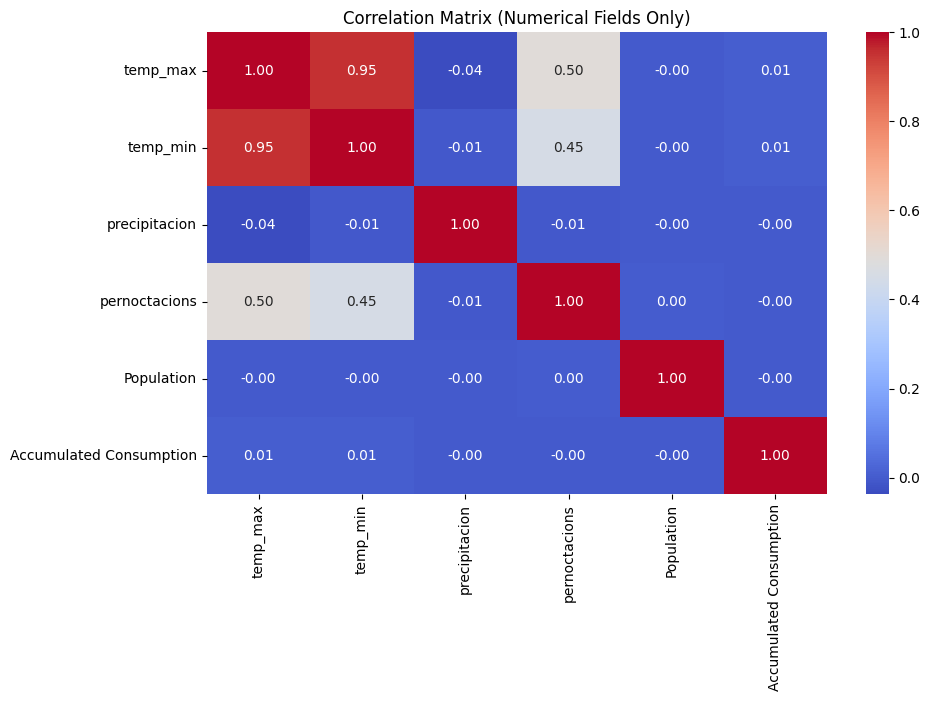

In [9]:
# Select only numerical columns for the correlation matrix
final_data['Population'] = final_data['Population'].astype(int)
numerical_cols = final_data.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix excluding non-numerical fields
filtered_correlation_matrix = final_data[numerical_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Fields Only)')
plt.show()



<a id="s3"></a>
## 3. Creació del algorisme de predicció

### 3.1 Investigació Previa 

La nostra recerca inicial es va centrar en l’anàlisi de sèries temporals, identificada com el component fonamental per a l’entrenament de models adaptats a les especificacions del nostre projecte. L’anàlisi de sèries temporals és particularment efectiva amb dades seriades que inclouen un component temporal; en aquest cas concret, organitzat diàriament. Aquest camp es divideix àmpliament en dues categories principals: tècniques de previsió de sèries temporals tradicionals i models moderns d’aprenentatge automàtic. La distinció principal entre aquests enfocaments rau en els seus mètodes i capacitats. Les tècniques tradicionals, com ARIMA i l’alissat exponencial (exponential smoothing), generalment es basen en fonaments estadístics per modelar les dades de manera lineal i són més adequades per a dades amb tendències clares i consistents i estacionalitat. D’altra banda, els models d’aprenentatge automàtic, incloent els random forests i les neural networks, ofereixen un enfocament més flexible capaç de capturar patrons no lineals complexos a través de l’ús d’algoritmes que aprenen de les dades, fent-los adequats per a sèries més volàtils amb estructures subjaents complexes.

Vam començar explorant models potencials adequats per als requisits específics del nostre projecte amb el model Seasonal AutoRegressive Integrated Moving Average (SARIMA), una variant de l’ARIMA que incorpora un component estacional per abordar les fluctuacions periòdiques. El model SARIMA és efectiu amb conjunts de dades més simples; però sovint té dificultats amb estructures de dades més complexes. Durant la nostra anàlisi, vam observar diversos resultats que van guiar el nostre procés de decisió. Els gràfics de diagnòstic, en particular el gràfic de residus i el gràfic Q-Q normal, van demostrar un ajust raonable, amb residus que no mostraven patrons discernibles i s’alineaven amb la distribució normal. No obstant això, els resultats del test de Ljung-Box, que no va mostrar autocorrelació significativa, juntament amb l’heteroscedasticitat alta observada, van indicar una variabilitat inconsistent en els errors del model a través de la sèrie temporal, suggerint una captura incompleta de la dinàmica del conjunt de dades. A més, una limitació significativa del model SARIMA és la necessitat de formar un model diferent de manera independent per a cada secció de cens o districte, i requereix coneixement previ sobre la selecció de l’ordre millor i l’ordre estacional dels paràmetres del model. Aquests factors combinats ens van portar a considerar enfocaments de modelatge alternatius que podrien acomodar més efectivament les complexitats inherents al nostre conjunt de dades divers.

Després dels nostres experiments inicials amb el model SARIMA, vam explorar l’ús del model Prophet de Facebook, conegut per la seva robusta gestió de dades de sèries temporals que mostren patrons estacionals forts i tendències irregulars. Prophet està dissenyat per incorporar fàcilment canvis en les tendències i els efectes estacionals, fent que inicialment semblés una eina prometedora per al nostre conjunt de dades, que implica dinàmiques complexes com el consum diari d’aigua i la variabilitat deguda a factors externs. Malgrat les capacitats de Prophet amb dades numèriques i el seu enfocament per modelar fluctuacions estacionals, les nostres avaluacions van indicar que el seu rendiment no era òptim per a les necessitats del nostre projecte. En les proves que implicaven prediccions de dades dins de la mostra, mentre que Prophet era capaç de generar previsions, els nivells d’exactitud no van complir amb les nostres expectatives. El gràfic de diagnòstic va destacar discrepàncies entre els valors predits i els punts de dades reals, suggerint que el model potser no captura tots els patrons subjacents de manera efectiva.

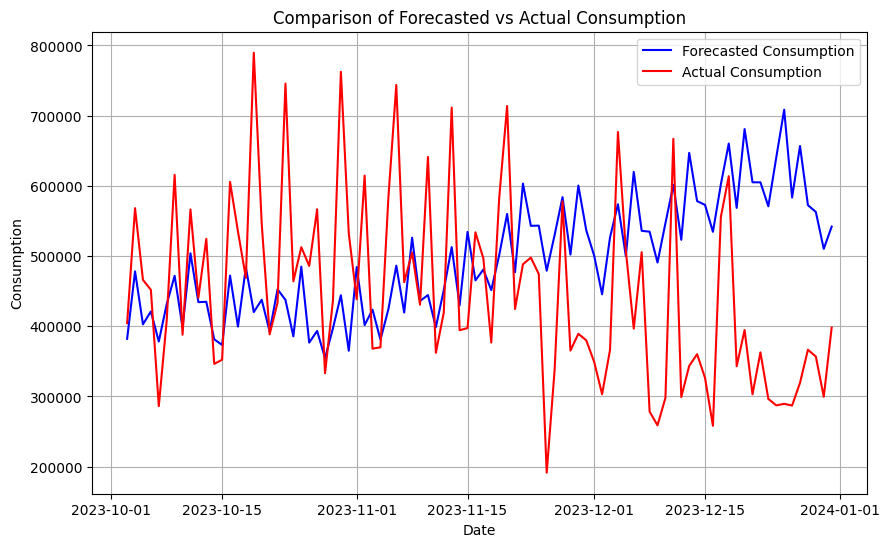

Les limitacions dels models explorats anteriorment provenien de la seva incapacitat per comptar amb la jerarquia relacional entre diferents districtes o seccions de cens, ja que estan dissenyats per manejar només una sèries única a la vegada. Per abordar millor les subtilitats estructurals del nostre conjunt de dades, que organitza les dades jeràrquicament, vam recórrer a un enfocament de previsió de sèries temporals jeràrquiques. Específicament, vam utilitzar un HTSRegressor, utilitzant un model SARIMAX com a motor de predicció subjacent. Aquesta elecció va estar motivada per l’aptitud de l’HTSRegressor per alinear-se estructural i lògicament amb la natura jeràrquica de les nostres dades, prometent una anàlisi més conscient del context. No obstant això, mentre l’HTSRegressor gestiona hàbilment la composició jeràrquica del conjunt de dades, roman com un model univariat, que prediu principalment el Consum Acumulat basat únicament en dades de consum anteriors. Aquest model no incorpora inherentment variables exògenes com el nombre de turistes o les condicions meteorològiques, que són clau per a previsions matissades en el nostre context. No obstant això, el potencial per integrar aquestes dades addicionals a l’HTSRegressor existeix i podria millorar significativament l’exactitud de les seves prediccions. Un inconvenient notable que vam trobar amb aquest model va ser la seva ocasiónal predicción de valors negatius per al consum, un resultat que és impracticable per als nostres propòsits.

Fins a aquest punt, els models que havíem explorat eren predominantment univariats, dissenyats per analitzar i predir basats en una sola sèrie de dades a la vegada. Aquest enfocament, tot i ser útil, pot no complir completament amb els requisits del nostre modelatge predictiu, especialment quan múltiples variables interrelacionades influeixen en el resultat. En conseqüència, vam canviar el nostre enfocament cap als models de Vector Autoregressió (VAR), que són inherentment multivariats i capaços de capturar les relacions entre diverses sèries temporals simultàniament. Vam implementar models VAR individualment per a cada districte o secció censal, permetent que el model prevegi valors futurs de manera autònoma sense la necessitat de configurar manualment els paràmetres. Tot i que les prediccions inicials van produir un marge d’error considerable, reconeixem el potencial substancial del model VAR per refinar i millorar les seves prediccions amb un conjunt de dades més extens. Les discussions detallades sobre les aplicacions específiques i el rendiment del model VAR seran exposades en altres seccions d’aquest document.

En la nostra recerca de models predictius efectius, també vam provar tècniques d’aprenentatge automàtic: Random Forest i Gradient Boosting, específicament utilitzant l’algoritme CatBoost. Aquests models van servir per establir una línia base de rendiment. Tot i que ambdós models van mostrar un rendiment global similar, CatBoost es particularment adequat per manejar conjunts de dades amb una proporció més alta de variables categòriques, com els identificadors de districte i secció de cens del nostre conjunt de dades. Aquest avantatge és degut a la capacitat inherent de CatBoost per processar dades categòriques directament, reduint així la necessitat d’un extens preprocés. Malgrat els seus avantatges teòrics, ambdós models van produir un Error Quadràtic Mitjà (MSE) d’aproximadament 19.635 milions, que indica un rendiment subòptim per a la nostra aplicació específica.

Donades les limitacions observades amb els models estadístics tradicionals i els models d’aprenentatge automàtic inicials, vam decidir avançar la nostra exploració en tecnologies de deep learning, específicament centrant-nos en un model de Long Short Term Memory (LSTM). Aquest model representa el nostre enfocament final per a la fase de simulació del nostre projecte. Les LSTMs són particularment hàbils en el maneig de dades de sèries temporals degut a la seva capacitat de recordar informació durant llargs períodes, la qual cosa és crucial per predir seqüències amb dependències temporals. Una discussió exhaustiva d’aquest model final, incloent la seva arquitectura, procés d’entrenament i aplicació específica al nostre conjunt de dades, serà proporcionada en les seccions següents.

### 3.2 Descripció de inputs i outputs

El model pren com a entrada una seqüència de vectors de característiques que inclouen tant dades històriques com futures. Cada vector de característiques conté variables clau que influeixen en el consum d’aigua, com ara la temperatura màxima i mínima, la precipitació, el nombre de pernoctacions (estades nocturnes de turistes) i la població resident del districte.

Per aconseguir això, el model incorpora prediccions externes i entrades proporcionades per l'usuari en la seva seqüència d'entrada. Per a les variables relacionades amb el clima, com la temperatura i la precipitació, els sistemes de predicció externa subministren els valors previstos per als dies futurs. Aquestes prediccions externes permeten al model considerar com les condicions meteorològiques futures poden influir en el consum d’aigua. Pel que fa a les pernoctacions, que reflecteixen l’activitat turística, l’usuari proporciona estimacions basades en els canvis esperats en els patrons de turisme. Aquesta entrada de l’usuari permet al model adaptar-se a escenaris específics, com ara variacions estacionals o esdeveniments de gran escala que afecten el nombre de visitants a cada districte.

Aquest enfocament de "divideix i venceràs" simplifica la tasca, centrant la capacitat predictiva de l’LSTM en el consum d’aigua, mentre que fonts externes s'encarreguen de la predicció de variables auxiliars. Com a resultat, la sortida del model és una seqüència de valors previstos de consum d’aigua per a l’horitzó temporal desitjat, basats tant en les condicions passades com en les futures anticipades a cada districte.

### 3.3 Explicació de l'algorisme

El model LSTM per predir el consum d’aigua a Barcelona està dissenyat per processar una seqüència d’entrades que inclouen tant dades històriques com futures, integrant prediccions meteorològiques externes i estimacions proporcionades pels usuaris sobre l’activitat turística, tal com s’ha especificat anteriorment.

Aquest disseny ofereix avantatges significatius. En incorporar prediccions meteorològiques externes, el model es beneficia de l'expertesa i la precisió dels sistemes de predicció especialitzats, superant els enfocaments de predicció multivariant estudiats anteriorment. A més, la flexibilitat d’incloure estimacions proporcionades pels usuaris sobre el nombre de turistes permet que el model s’adapti a escenaris específics, com ara increments o disminucions sobtades en l’activitat turística a causa d’esdeveniments, vacances o altres factors externs. Aquesta capacitat garanteix que les prediccions de consum d’aigua siguin precises i sensibles a les condicions del món real.

In [10]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer to output regression

    def forward(self, x, predicted_days=90):
        # x is of shape (batch_size, sequence_length, input_size)
        x, _ = self.lstm(x)  # Get the last hidden state
        out = self.fc(x[:,-predicted_days:,:])  # Use the last hidden state to predict
        return out

<a id="s4"></a>
## 4. Entrenament i validació del algorisme de predicció

L'entrenament i validació del model LSTM per predir el consum d’aigua a Barcelona es basen en un enfocament estructurat que inclou dades històriques i futures. Per entrenar el model, s’utilitzen seqüències de dades que comprenen els darrers 365 dies com a entrada històrica i els 90 dies futurs com a horitzó de predicció. L'objectiu és predir el consum d’aigua diari durant aquest període de 90 dies futurs.

A partir de les dades disponibles, es generen seqüències per entrenar el model. En concret, es creen n_samples - 365 - 90 + 1 seqüències, on cada seqüència conté 365 + 90 vectors d’entrada corresponents als dies passats i futurs i 90 valors de sortida corresponents a les prediccions futures. 

Abans d'entrenar el model, s'aplica una normalització de les dades mitjançant MinMax Scaling per assegurar que totes les característiques es trobin dins d’un rang comú.

Els resultats de l’entrenament mostren un rendiment altament satisfactori, amb un error quadràtic mitjà (MSE) normalitzat inferior a 0.002 en la majoria dels districtes. Això indica que el model és capaç de capturar amb precisió les dinàmiques del consum d’aigua a nivell local, integrant les dades històriques, les prediccions externes i les entrades proporcionades pels usuaris.

El codi a continuació mostra el MSE normalitzat per cada districte, i la comparació entre el valor de 4 seqüencies (aleatoriament escollides) predites i reals.

In [11]:
def generate_sequences(data, target_data, past_sequence_length, future_sequence_length):
    n_samples = data.shape[0] - (past_sequence_length + future_sequence_length) + 1
    n_features = data.shape[1]
    X  = np.zeros((n_samples, past_sequence_length, n_features))
    y = np.zeros((n_samples, future_sequence_length))
    for i in range(n_samples):
        X[i] = data.iloc[i:i+past_sequence_length].to_numpy()
        y[i] = target_data.iloc[i:i+future_sequence_length].to_numpy().squeeze()

    return X, y

In [12]:
df = pd.read_csv("./data/local_data/merged_cleaned_data_NEW.csv")

df = df.drop("Census Section", axis=1)
df = df.drop("Use", axis=1)

df = df.groupby(['Date', 'District']).agg(
    n_meters=('Number of Meters', 'sum'),
    accumulated_consumption=('Accumulated Consumption', 'sum'),
    max_temperature=('temp_max', 'first'), 
    min_temperature=('temp_min', 'first'), 
    precipitation=('precipitacion', 'first'),
    pernoctacion=('pernoctacions', 'first'),
    population=('Population', 'first')
).reset_index()

df = df.set_index("Date")

Test Loss for district 1: 0.0003


<Figure size 1000x600 with 0 Axes>

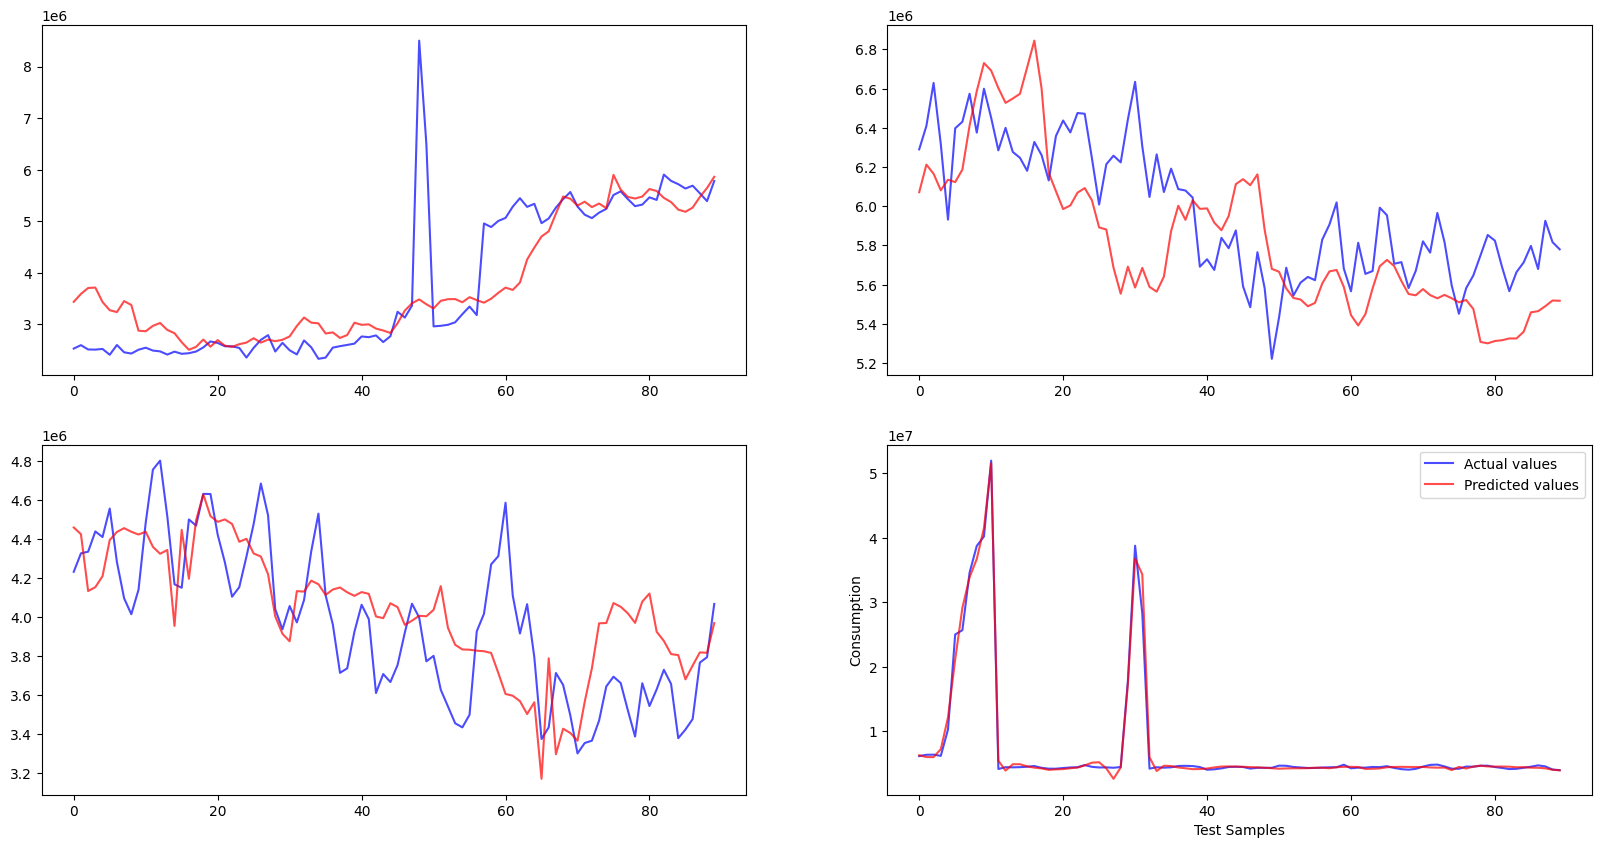

Test Loss for district 2: 0.0007


<Figure size 1000x600 with 0 Axes>

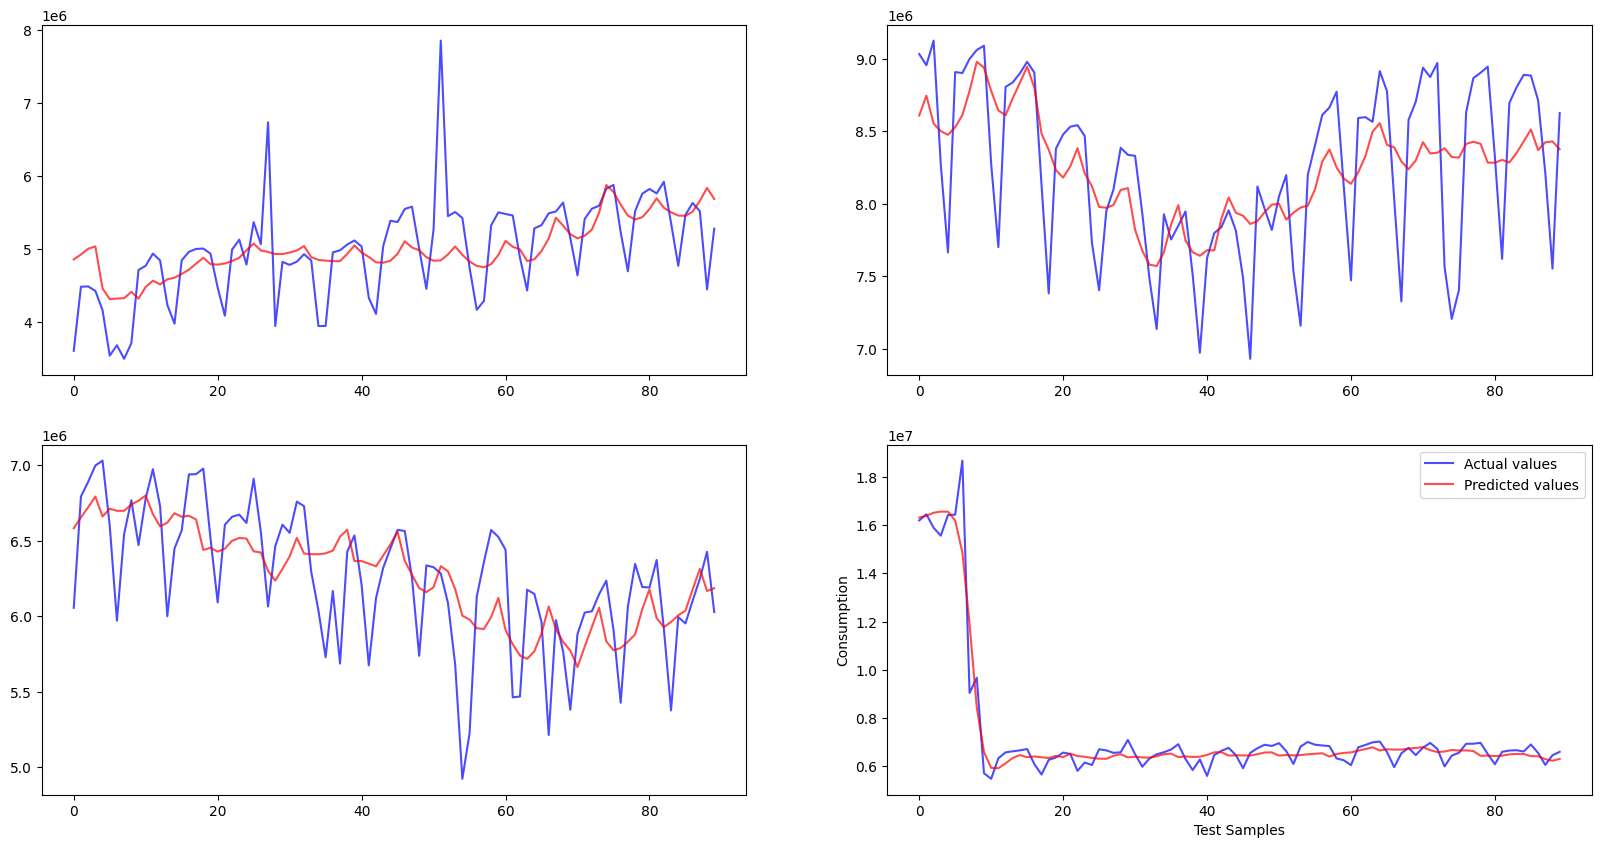

Test Loss for district 3: 0.0105


<Figure size 1000x600 with 0 Axes>

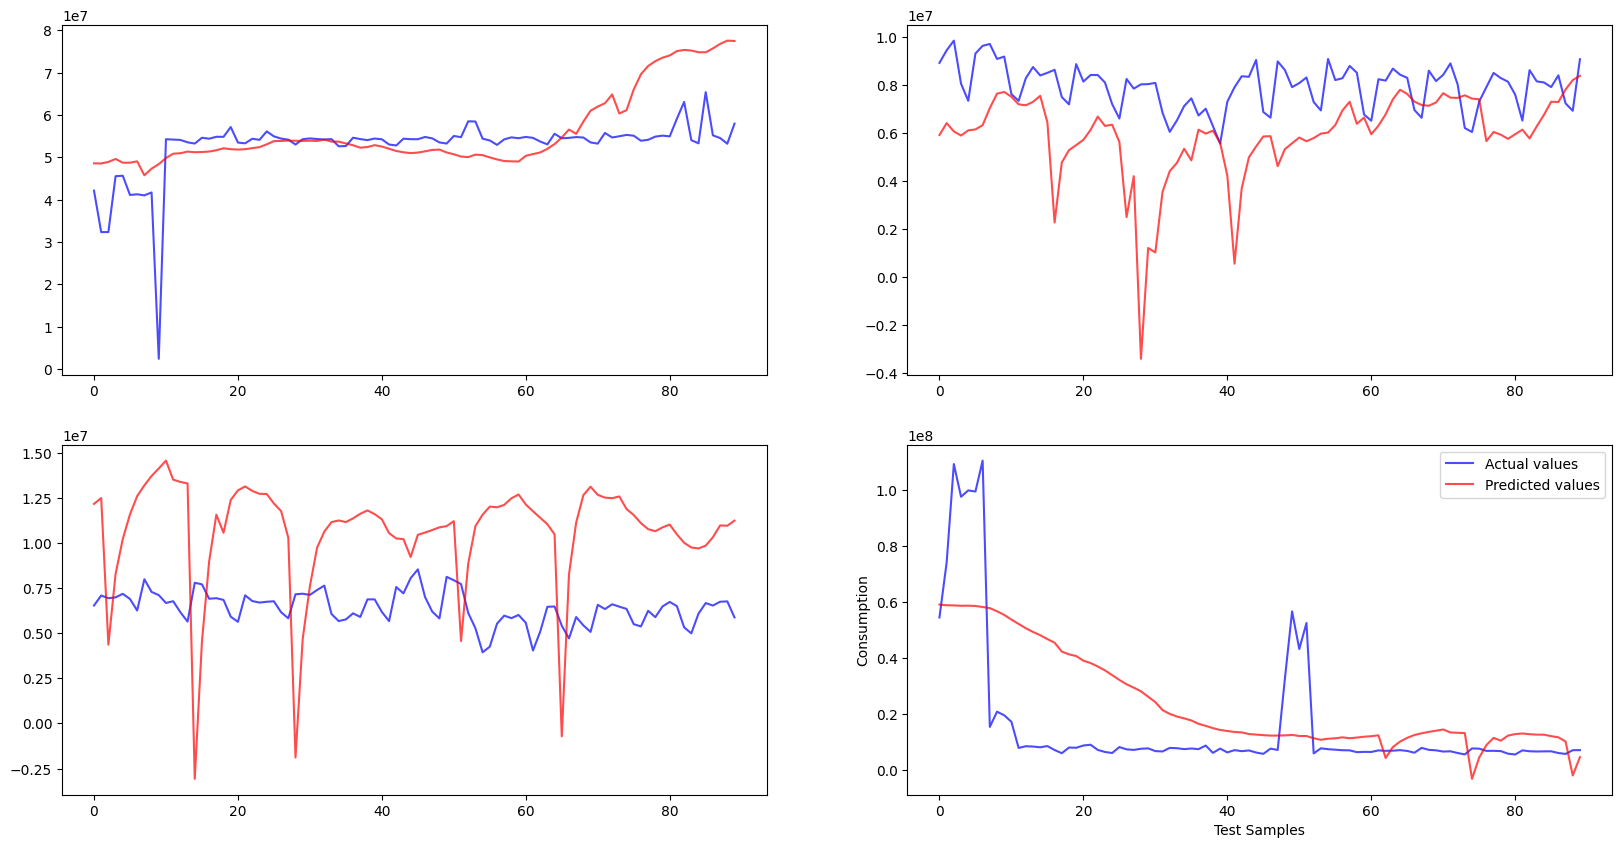

Test Loss for district 4: 0.0024


<Figure size 1000x600 with 0 Axes>

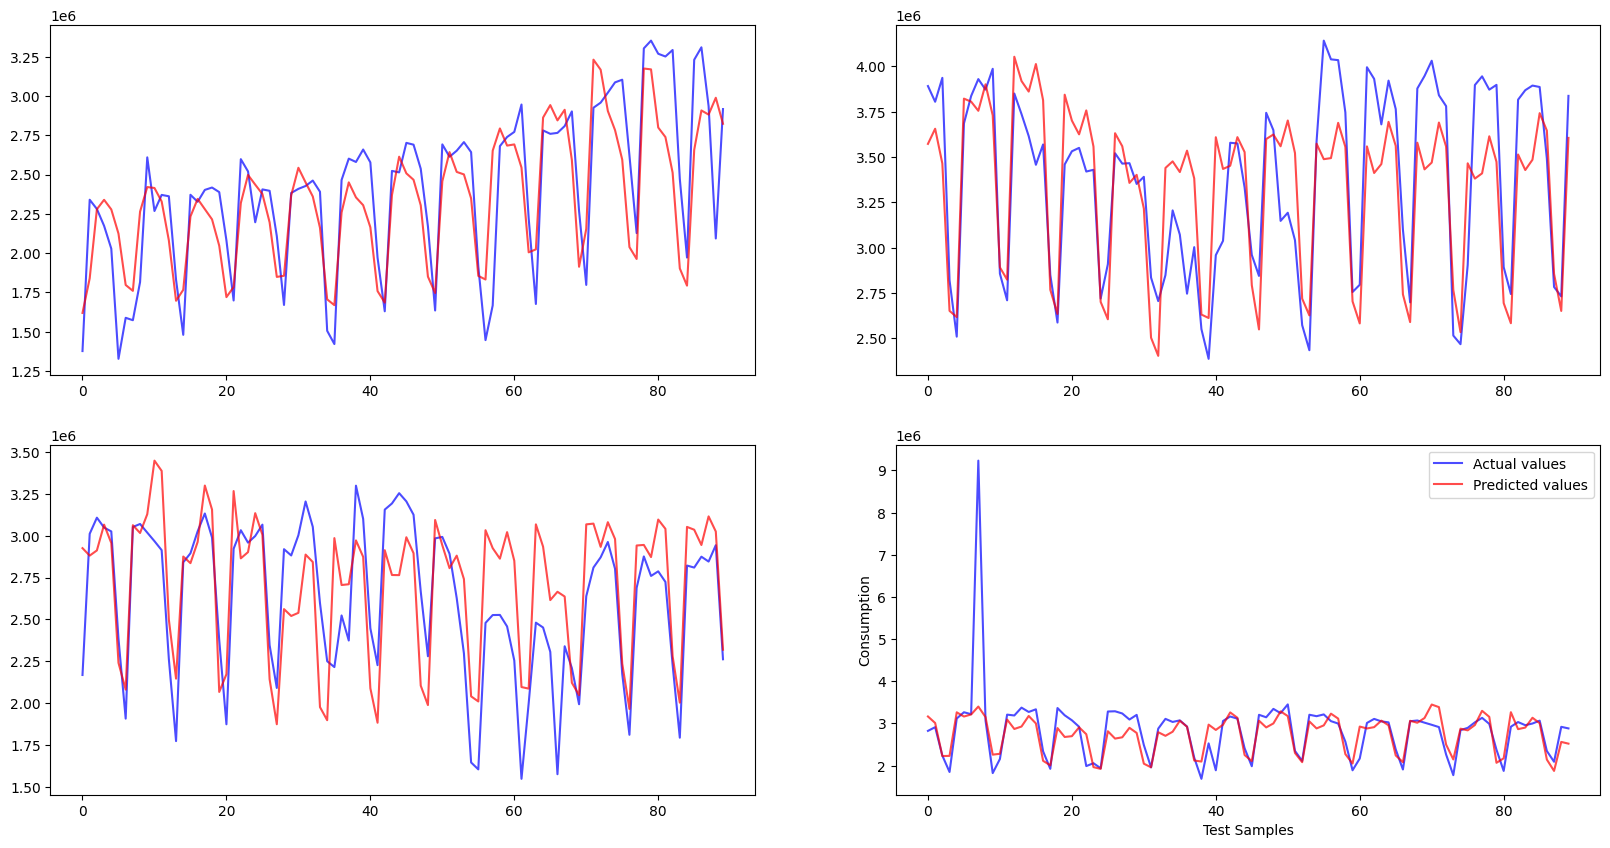

Test Loss for district 5: 0.0053


<Figure size 1000x600 with 0 Axes>

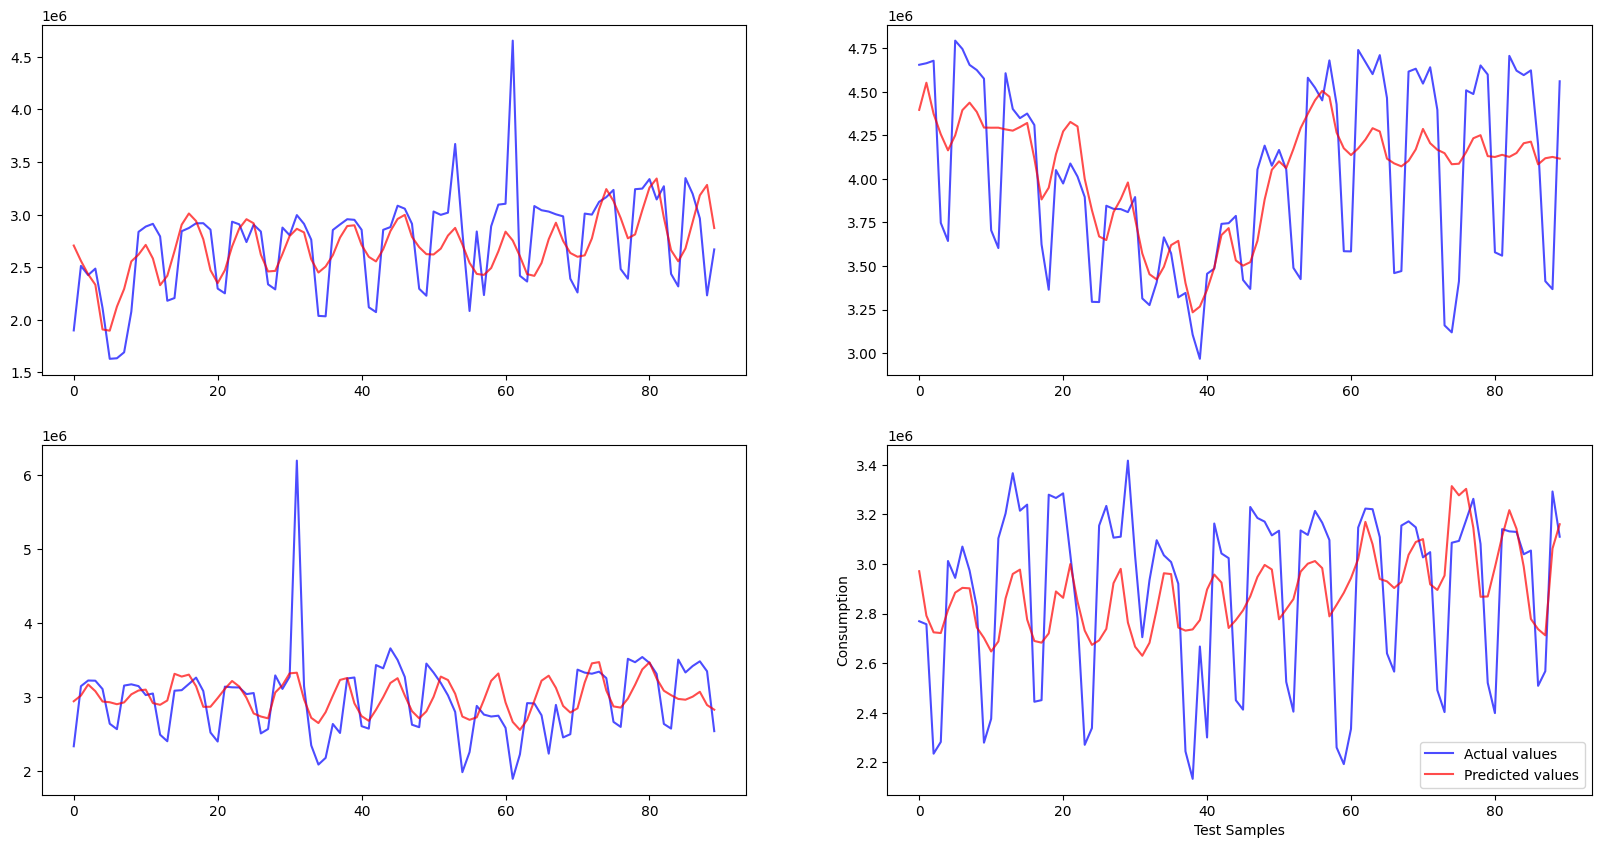

Test Loss for district 6: 0.0006


<Figure size 1000x600 with 0 Axes>

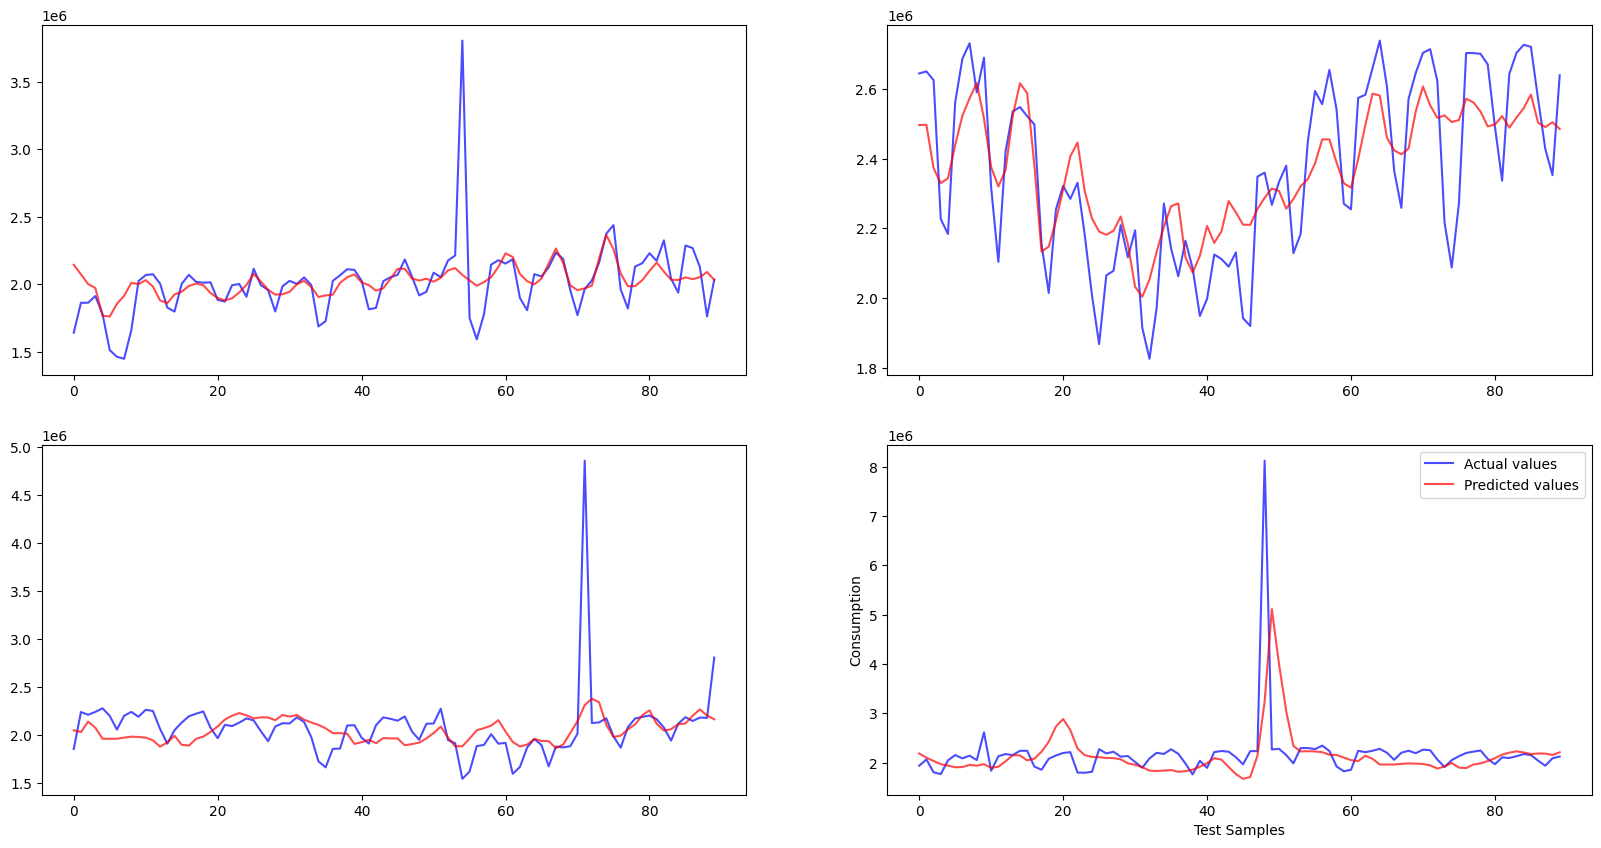

Test Loss for district 7: 0.0018


<Figure size 1000x600 with 0 Axes>

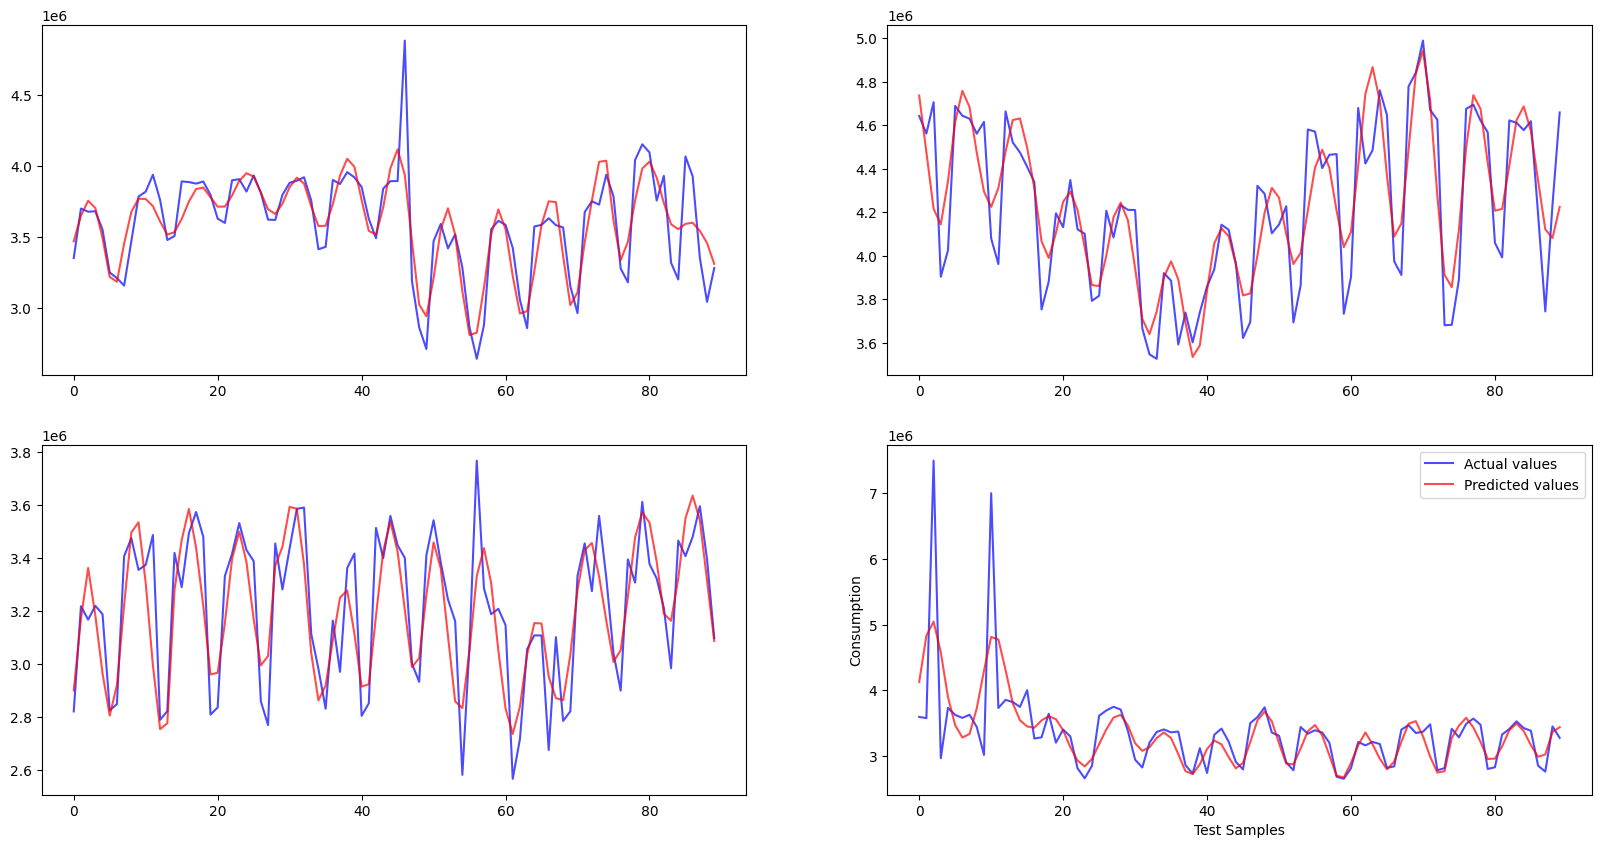

Test Loss for district 8: 0.0084


<Figure size 1000x600 with 0 Axes>

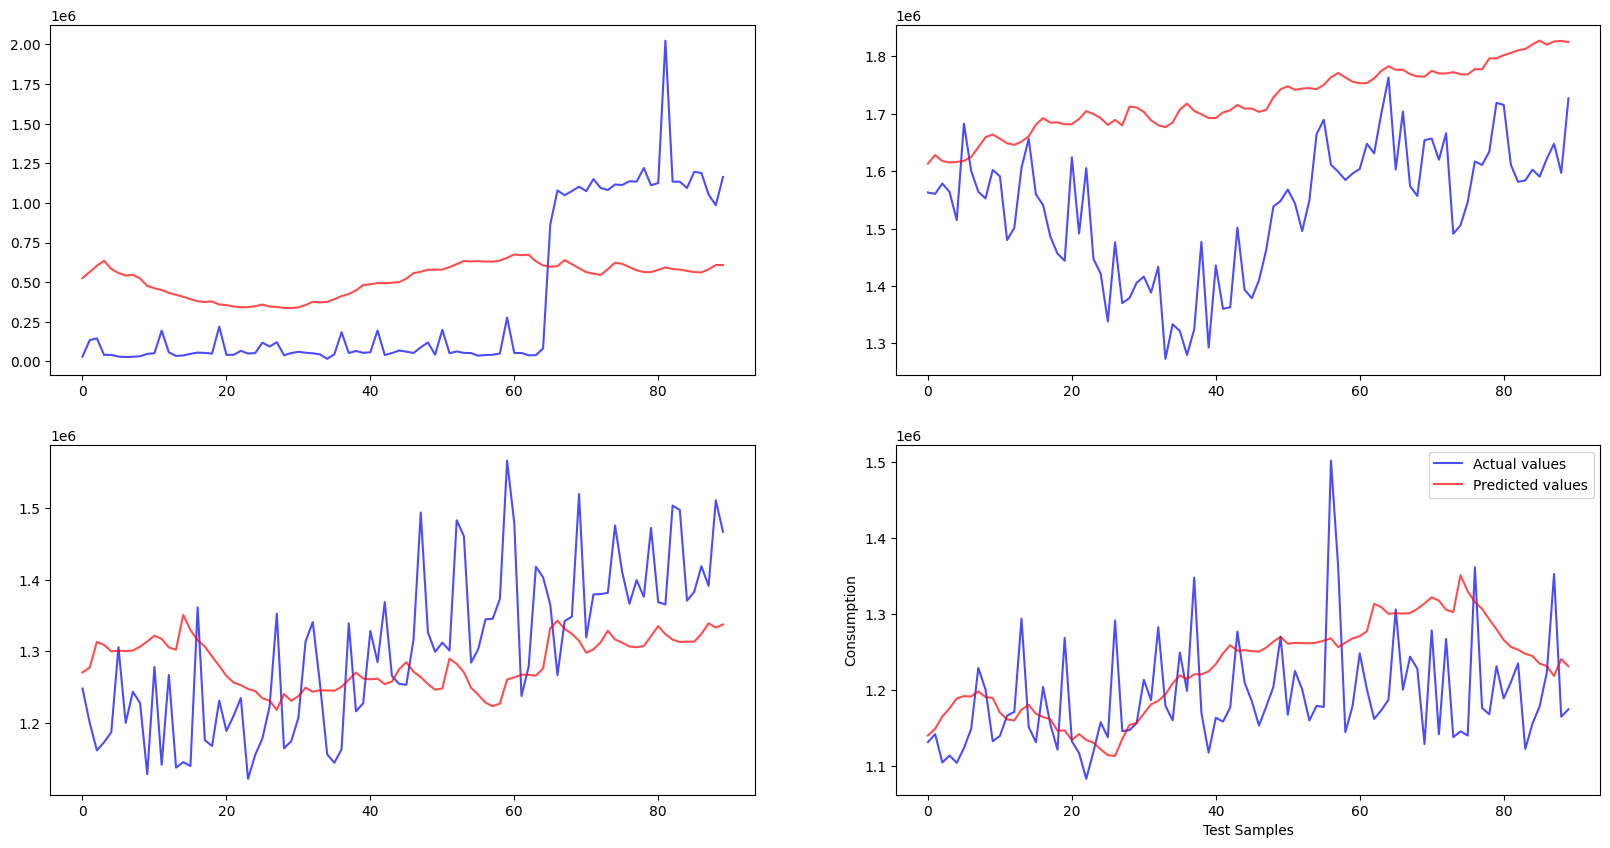

Test Loss for district 9: 0.0018


<Figure size 1000x600 with 0 Axes>

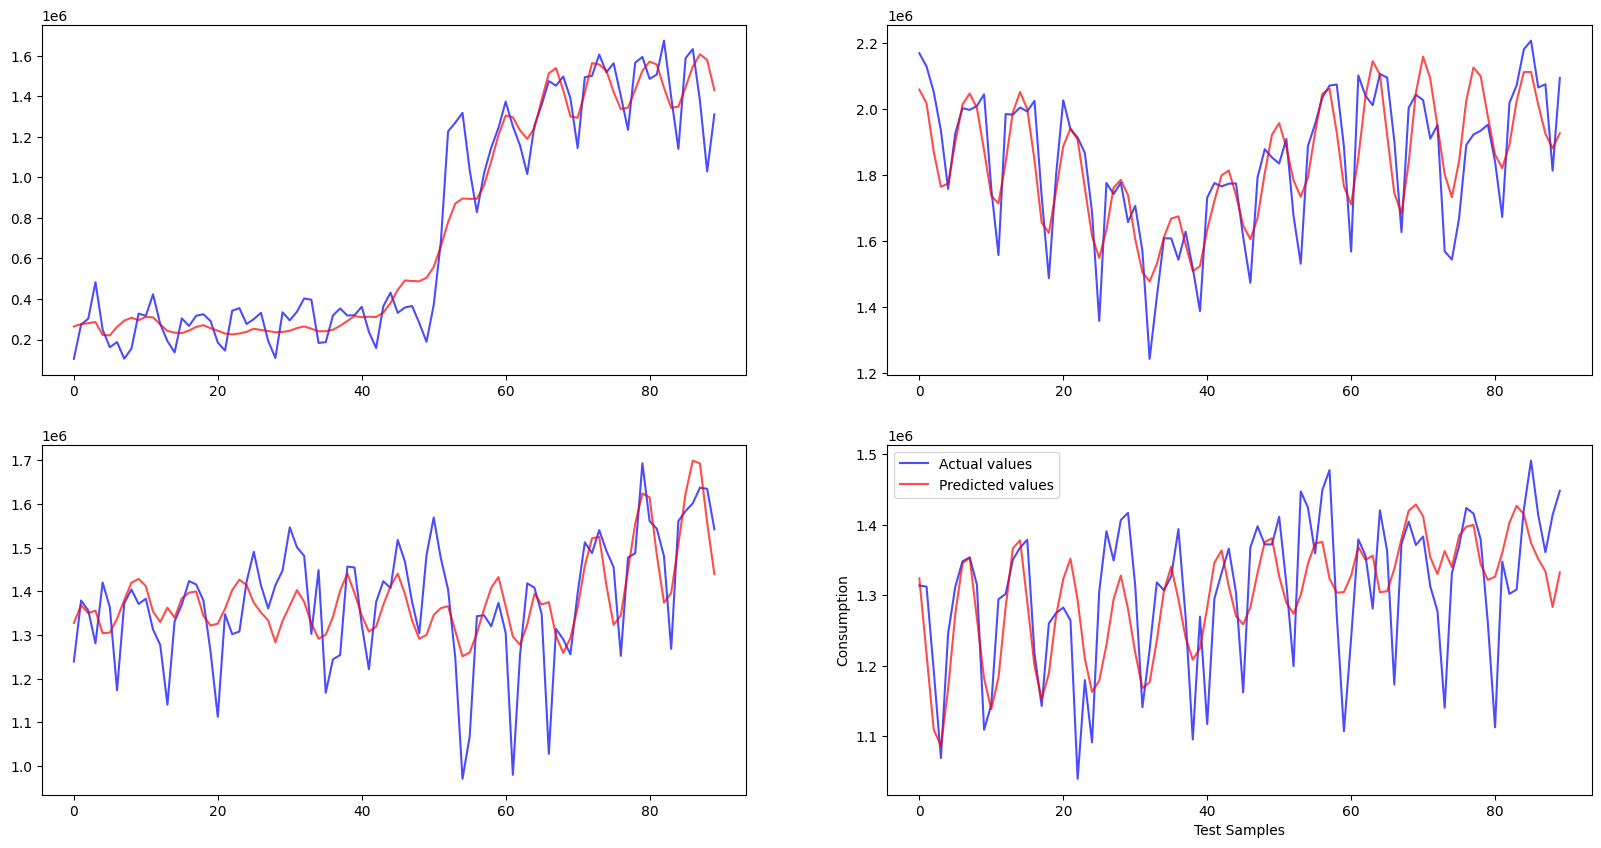

Test Loss for district 10: 0.0007


<Figure size 1000x600 with 0 Axes>

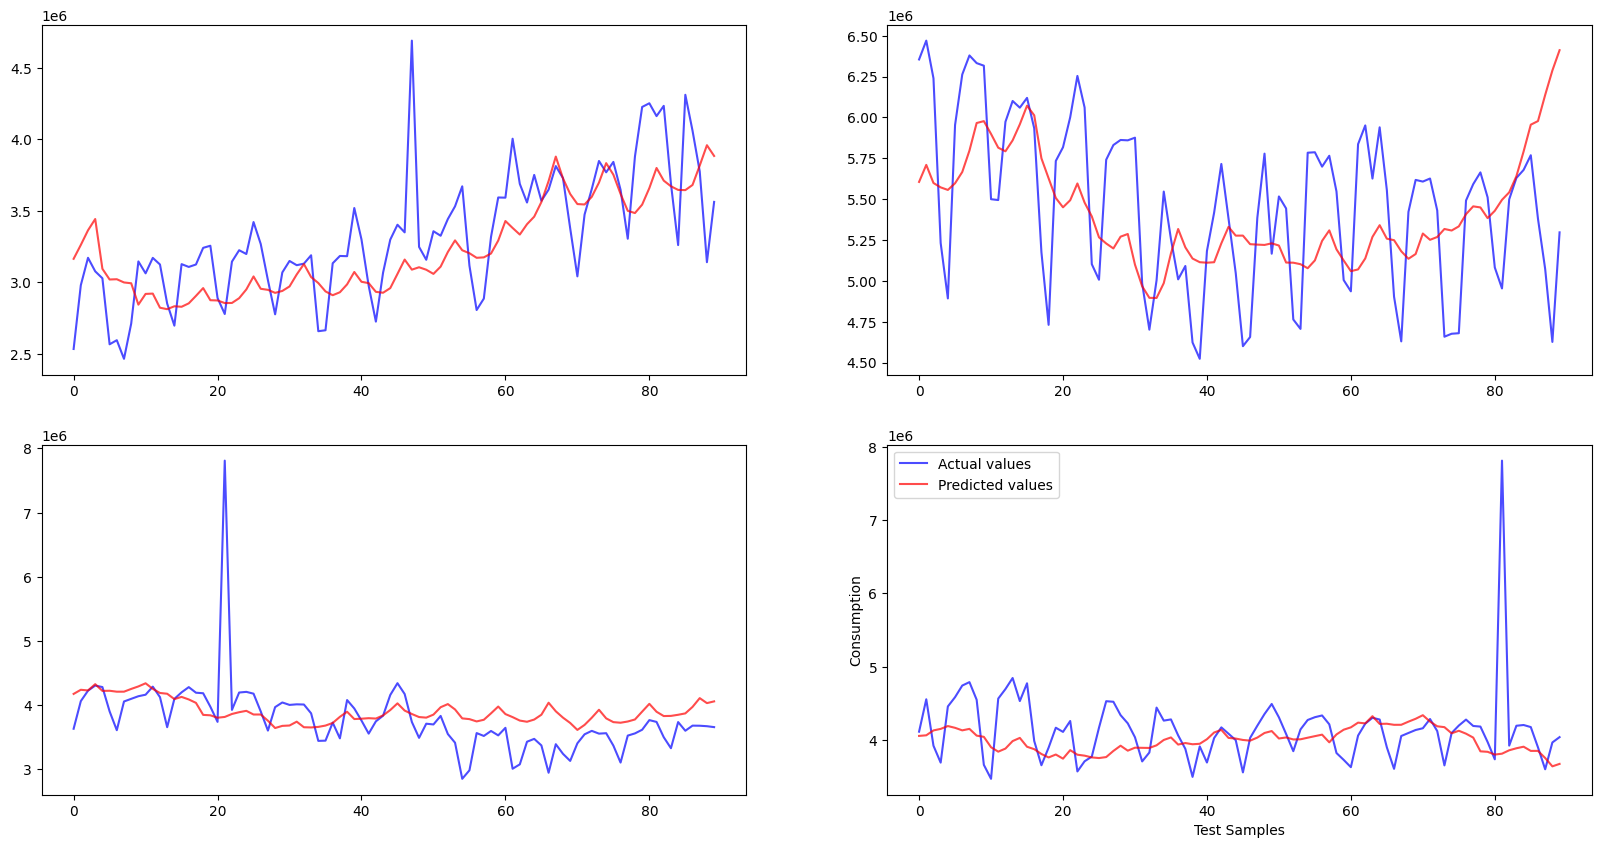

In [13]:
# Aprox 30min to Execute
from collections import defaultdict

# Generate the sequences of input values - target
n_past = 365
n_future = 90 # Number of inputs used to predict the next day
# Training loop
epochs = 200
batch_size = 32


# Dictionary of the shape {district_id: (scaler_x, scaler_y)}
scalers = defaultdict(list)
models = {}


for district_id in range(1,11):
    df_district = df[df["District"] == district_id]

    data_x = df_district[["n_meters", "max_temperature", "min_temperature", "precipitation", "pernoctacion", "population"]]
    data_y = df_district[["accumulated_consumption"]]


    # Scale the input features
    scaler_x = MinMaxScaler()
    scaled_x = scaler_x.fit_transform(data_x)
    scaled_x_df = pd.DataFrame(scaled_x, columns=data_x.columns)
    scalers[district_id].append(scaler_x)

    # Scale the target features
    scaler_y = MinMaxScaler()
    scaled_y = scaler_y.fit_transform(data_y)
    scaled_y_df = pd.DataFrame(scaled_y, columns=data_y.columns)
    scalers[district_id].append(scaler_y)

    X, y = generate_sequences(scaled_x_df, scaled_y_df, n_past, n_future)

    # Convert to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

    # Model hyperparameters
    input_size = data_x.shape[1]  # Number of features at each time step
    hidden_size = 50  # LSTM hidden state size
    output_size = 1  # Single value for regression

    # Instantiate the model
    model = LSTMRegressor(input_size, hidden_size, output_size)

    # Loss and optimizer
    criterion = nn.MSELoss()  # Mean squared error for regression
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    train_loss_history = []

    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))  # Shuffle the training data
        epoch_loss = 0
        for i in range(0, X_train.size(0), batch_size):
            # Get the batch
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train[indices], y_train[indices]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()


    # Evaluate the model on test data
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test).squeeze() 
        test_loss = criterion(test_predictions, y_test)
        print(f"Test Loss for district {district_id}: {test_loss.item():.4f}")

        test_predictions_rescaled = scaler_y.inverse_transform(test_predictions.detach().numpy())
        test_rescaled = scaler_y.inverse_transform(y_test.detach().numpy())

        # Visualize the results: Predicted vs Actual
        plt.figure(figsize=(10, 6))
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

        for i in range(2):
            for j in range(2):
                idx = i + j*7
                # Plotting the predicted values against the actual values
                ax[i][j].plot(test_rescaled[idx], label='Actual values', color='blue', alpha=0.7)
                ax[i][j].plot(test_predictions_rescaled[idx], label='Predicted values', color='red', alpha=0.7)
        plt.xlabel('Test Samples')
        plt.ylabel('Consumption')
        plt.legend()

        # Show the plot
        plt.show()

    models[district_id] = model

<a id="s5"></a>
## 5. Simulació

<a id="s51"></a>

### 5.1 Explicació de l'objectiu de la simulació

Una simulació dels resultats, combinada amb un estudi estàtic, és essencial per a AGBAR perquè permet abordar de manera dinàmica i estratègica els reptes de la gestió hídrica. Aquí en detallem les raons principals:

#### Raons per a la simulació:  
1. **Adaptació immediata a situacions canviants:**  
   La simulació permet reaccionar en temps real davant factors com un augment sobtat de turistes o condicions meteorològiques extremes, ajustant la distribució d’aigua segons les necessitats.  

2. **Projecció de futurs escenaris:**  
   Mitjançant simulacions, AGBAR pot anticipar diferents escenaris de consum i preparar-se per a pics de demanda o situacions d’escassetat, optimitzant recursos de manera proactiva.  

#### Raons per a l’estudi estàtic:  
1. **Identificació de patrons a llarg termini:**  
   L’estudi estàtic ofereix una comprensió profunda de les tendències històriques i estructurals del consum d’aigua, ajudant a dissenyar polítiques sostenibles i ajustades a la realitat de cada zona.  

2. **Suport a la presa de decisions estratègiques:**  
   Amb dades estàtiques fiables, AGBAR pot justificar inversions en infraestructures i programes d’eficiència hídrica, basant-se en patrons comprovats i consistents.  

<a id="s52"></a>
### 5.2 Instruccions per corre la simulació

Per executar l'aplicació simplement cal executar el codi de baix.



#### Accedir a l'aplicació
- Quan executis la comanda, Streamlit obrirà automàticament l’aplicació al navegador web predeterminat.
- Per defecte, estarà disponible a l’adreça: [http://localhost:8501](http://localhost:8501).



#### Aturar l’aplicació
- Per aturar l’aplicació, simplement cal aturar l'execució de la casella següent.



In [14]:
# Change to the 'display' directory
os.chdir('display')

# Run the Streamlit application
subprocess.run(["streamlit", "run", "main.py"])


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8524
  Network URL: http://192.168.1.148:8524

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            


KeyboardInterrupt: 

Alternativament, es pot correr l'aplicació a través de la terminal:

### Com executar la simulació Streamlit de `main.py` des de la terminal


#### 1. Obrir la terminal
- Navega al directori display. 
- Accedeix al terminal o consola del teu sistema operatiu.


#### 2. Executar Streamlit
Utilitza la següent comanda per iniciar l’aplicació:

```bash
streamlit run display/main.py
```


#### 3. Accedir a l'aplicació
- Quan executis la comanda, Streamlit obrirà automàticament l’aplicació al navegador web predeterminat.
- Per defecte, estarà disponible a l’adreça: [http://localhost:8501](http://localhost:8501).



#### 4. Aturar l’aplicació
- Per aturar l’aplicació, torna a la terminal on s’està executant i prem **Ctrl+C**.


#### Problemes comuns
- Si la comanda `streamlit` no funciona, assegura’t que Streamlit està instal·lat correctament:
  ```bash
  pip install streamlit
  ```

<a id="s53"></a>

### 5.3 Descripció de les pàgines de la simulació

Aquesta aplicació té diverses pàgines de visualització on podràs conèixer més sobre el projecte, veure els detalls i explorar la informació. Aquí tens una explicació de com funciona cada pàgina i com navegar-hi:



### Com Navegar Entre Pàgines

- El **menú de navegació** (ubicat lateral de la pàgina) et permet canviar fàcilment entre pàgines.
- Simplement fes clic a **“Sobre Nosaltres,” “Sobre el Projecte,”**, **“Estudi Estàtic”** o **“Predicció”** per anar a la pàgina desitjada.



### Pàgines de l'Aplicació

#### 1. Sobre Nosaltres

Aquesta pàgina presenta l'equip darrere del projecte. Podràs conèixer qui ha desenvolupat l'aplicació i obtenir més informació sobre les seves funcions.

#### 2. Sobre el Projecte

Aquesta pàgina explica el propòsit i els objectius del projecte. Detalla el que l'aplicació està dissenyada per fer i com pot ajudar als usuaris.

#### 3. Estudi Estàtic

   ##### **Objectiu**:
   Aquesta pàgina mostra dades estàtiques o resultats de recerca relacionats amb el projecte.

   ##### **Com fer-ho servir**:
   Aquí tens com funciona la selecció de períodes de temps per a tu com a usuari:

   1. Tria un any:
      - Primer, veuràs un menú desplegable etiquetat **"Seleccionar any"**. Aquí pots triar entre:
      - **Tots els anys** – Aquesta opció et permet veure les dades agrupades per tots els anys disponibles al conjunt de dades.
      - **2021**, **2022**, **2023** – Pots triar un any específic si vols centrar-te en les dades d'aquest any en concret.

   2. Selecciona un mes (si cal):
      - **Si seleccionas un any específic** (per exemple, **2021**, **2022**, **2023**), apareixerà un segon menú desplegable per seleccionar un mes. Aquest estarà etiquetat com **"Seleccionar mes"**, i podràs triar entre:
      - **Tots els mesos** – Aquesta opció et permet veure les dades agrupades per tots els mesos de l'any seleccionat.
      - **Gener**, **Febrer**, **Març**, etc. – Aquests són els mesos de l'any. Selecciona un mes per veure les dades d'aquest mes i any.

   3. Com esgrupen les dades segons les teves seleccions:
      - Si seleccionas **"Tots els anys"**, les dades s'agrupen per **mes**, mostrant tendències a través de tots els anys.
      - Si selecciones un **any** específic i **"Tots els mesos"**, les dades s'agrupen per **setmana** per a l'any seleccionat.
      - Si seleccionas un **any** i **mes** específic, les dades s'agrupen per **dia** per a aquest mes i any.

   D'aquesta manera, oferim més precisió a mesura que les dates són més específiques.

   4. Notes importants:
      - Si no fas seleccions vàlides (per exemple, si no tries cap any o mes), veuràs una advertència que diu: **"Please make valid selections to generate the plots."** (Selecciona les opcions correctes per generar els gràfics.)

   5. Gràfics mostrats
      
      1. *Consum d'Aigua per Tipus d'Ús:* Mostra el consum d'aigua per categories com residencial, comercial i industrial, ajudant a identificar les àrees de major consum per a estratègies de conservació específiques.
         
      2. *Consum d'Aigua per Districte:* Compara el consum d'aigua entre diferents districtes, ressaltant les àrees amb major consum per orientar estratègies de reducció del consum.
         
      3. *Consum d'Aigua per Districte i Tipus d'Ús:* Desglossa el consum per districtes i tipus d'ús per proporcionar una visió detallada de com es distribueix el consum a través de les diferents zones de la ciutat.
         
      4. *Consum d'Aigua vs. Allotjaments Turístics:* Examina la relació entre els allotjaments turístics i el consum d'aigua, mostrant com els turistes influeixen en la demanda d’aigua.
         
      5. *Consum d'Aigua vs. Precipitació:* Analitza com la precipitació afecta el consum d'aigua, destacant períodes de sequera i pluja intensa.
      
      6. *Consum d'Aigua vs. Temperatura:* Mostra com les temperatures extremes poden augmentar el consum d'aigua en les llars i les indústries.

#### 4. Predicció

##### **Objectiu**:
   Aquesta pàgina permet fer una predicció del consum del aigua a un període màxim de 90 dies on l'usuari afegeix el nombre de turistes que vol.

   ##### **Com fer-ho servir**:
   Aquí tens com funciona la selecció del període de temps, el nombre de turistes i la seva distribució.

   1. Tria fins quan vols la predicció
      - Les dades proporcionades per AGBAR (daily_dataset) acaben el 31/12/2023, i perquè la predicció sigui fiable no podem fer-la a més de 90 dies vista, es per això que es podra seleccionar una data fins el 30/03/2024.
   2. Intoduir el nombre de turistes
      - Aquí s'introdueix el nombre de turistes totals que vols que vinguin en total en el període de temps seleccionat.
      - A la casella de "Introdueix l'estada mitjana dels turistes (en dies)" introduiras quantes nits de mitja es queda cada turista, fet que ajudarà a calcular les pernoctacions diaries totals.
   3. Escull la distribució de turistes
      - La distribució de turistes pot ser o bé regular o bé teniu un període de concentració.
      - Si esculls distribució regular els turistes es distribuiran de manera regular a traves de tot el periode d'estudi amb algunes fluctuacions (per exemple en caps de setmana) com s'ha fet al punt 2.4 d'aquest notebook. Un cop seleccionada aquesta opció prem el botó "calcular distribució" i t'apareixera el consum predit, així com totes les gràfiques de l'estudi estàtic d'aquest període. 
   4. Afegir períodes de concentració
      - Com bé sabeu, els turistes no sempre arriben de manera regular, hi ha períodes de temps com are festes o events on se'n concentren més. És per això que hem afegit la funció per crear períodes de concentració. 
      - Per afegir aquest període s'haura de seleccionar data d'inici i final del període, nombre de turistes i estada mitjana d'aquests (durant aquest període). 
      - Es poden afegir més períodes de concentració prement el botó "Afegir un nou període de concentració".
      - Un cop afegida tota la informació, premeu "Calcular distribució" i obtindreu la predicció.
   5. Descarregar les dades 
      - Per últim, com a part dels outputs que surten quan es prem "Calcular distribució" hi ha una taula amb les 15 primeres columnes de la predicció, però si prems "Descarregar el resultat complet en format CSV" es descarregarà el CSV amb la predicció.
   

<a id="s6"></a>
## 6. Recomanacions accionables

<a id="s61"></a>
### 6.1 Integrar model predictiu en operacions dinàmiques de gestió de l’aigua

La integració de models predictius en les operacions diàries de gestió de l’aigua d’Aigües de Barcelona pot millorar significativament l’eficiència, la capacitat de resposta i l’optimització dels recursos. Incorporant aquests models en els fluxos de treball quotidians, l’empresa pot anticipar les tendències de la demanda d’aigua i distribuir els recursos de manera dinàmica. Aquest enfocament proactiu assegura que l’oferta s’adapti a la demanda, minimitzant el malbaratament i reduint el risc d’escassetat durant períodes d’alta demanda.

* El model predictiu es pot utilitzar per automatitzar horaris de distribució d’aigua adaptats a les necessitats de cada districte. Per exemple, durant les temporades de turisme intens, els models poden preveure un augment de la demanda en zones com Ciutat Vella o l’Eixample. A partir d’aquestes prediccions, es poden prioritzar els recursos hídrics per a aquests districtes, mantenint alhora nivells bàsics per a les àrees residencials amb patrons de consum estables. El procés implicaria establir llindars per al consum predit a cada districte i automatitzar l’ajustament del flux d’aigua en funció d’aquestes prediccions. Per exemple, si el model detecta un augment del 15% en l’ús de l’aigua en zones turístiques degut a un esdeveniment local o festival, el sistema podria derivar aigua addicional a aquests districtes des de dipòsits centrals, tot monitoritzant i assegurant que altres zones no es vegin afectades negativament.

* Un sistema de gestió dinàmica de l’aigua també pot incloure ajustaments en temps real. Mitjançant la integració de sortides predictives amb sistemes de monitorització basats en IoT, els models poden refinar contínuament les prediccions a partir de dades d’ús reals. Per exemple, si els sensors en temps real detecten un augment inesperat en l’ús de l’aigua per una afluència sobtada de turistes o un esdeveniment imprevist, el sistema pot reassignar recursos addicionals dinàmicament als districtes amb alta demanda. Aquest bucle de retroalimentació enforteix les prediccions del model i millora l’agilitat operativa.

* Per optimitzar encara més la distribució de recursos, es poden establir sistemes d’alerta primerenca basats en el model predictiu. Aquests sistemes asseguren que tant els operadors com els responsables de la presa de decisions estiguin millor preparats per gestionar canvis sobtats en els patrons de consum causats per factors com afluències de turistes, onades de calor o esdeveniments públics importants. Per exemple, si el model prediu que les condicions meteorològiques (com temperatures altes) combinades amb un augment de l’activitat turística provocaran un increment significatiu en l’ús de l’aigua, el sistema pot activar una alerta. Aquesta alerta notificaria els operadors i suggeriria accions concretes, com augmentar l’emmagatzematge d’aigua en dipòsits locals, optimitzar els fluxos de canonades cap als districtes amb alta demanda o llançar campanyes de conservació d’aigua a curt termini adreçades tant als residents com als turistes.

* Aquest sistema també es podria integrar amb quadres de comandament en temps real que mostrin les prediccions al costat de les dades d’ús reals, proporcionant als operadors una visió completa. Els correus electrònics automatitzats, les notificacions SMS o les alertes a través d’aplicacions garantirien que les parts interessades pertinents estiguessin informades immediatament quan les prediccions superessin els llindars establerts. Per exemple, si les taxes d’ocupació dels allotjaments turístics d’un districte arriben al 90%, combinades amb una previsió d’augment de temperatures, el sistema podria recomanar incrementar el subministrament als dipòsits propers o ajustar els horaris de distribució en conseqüència. A més, les alertes poden servir com a desencadenants per a campanyes de conscienciació pública que fomentin l’estalvi d’aigua durant els períodes d’ús intensiu.

* Un altre aspecte important de la gestió dinàmica de l’aigua és la capacitat d’integrar les prediccions en esforços de conservació. Per exemple, durant períodes d’alta demanda anticipada, es poden llançar campanyes d’estalvi d’aigua dirigides a districtes amb alta concentració de turisme. Hotels, restaurants i altres establiments comercials poden ser incentivats per adoptar pràctiques eficients en l’ús de l’aigua, recolzats per campanyes de conscienciació pública adreçades tant a turistes com a residents. Això assegura un enfocament equilibrat per gestionar l’augment de la demanda, alhora que es promouen hàbits de consum sostenibles.

<a id="s62"></a>
### 6.2 Proves What-If per a la Gestió Proactiva de l’Aigua i la Planificació Estratègica

El nostre model permet explorar els impactes potencials de situacions hipotètiques mitjançant proves d’escenaris. Aquest procés proporciona una manera estructurada d’anticipar i mitigar riscos, assegurant un equilibri entre l’oferta i la demanda fins i tot en condicions d’incertesa.

La implementació comença amb la definició d’escenaris específics que s’alineïn amb els reptes del sistema de gestió de l’aigua de Barcelona. Per exemple, el model predictiu pot simular l’impacte d’un augment del 20% en les arribades de turistes durant els mesos d’estiu en la demanda d’aigua en districtes clau. Aquesta simulació analitzaria com aquesta pujada podria afectar zones d’alta demanda, com ara punts turístics, àrees comercials i barris residencials.

A partir d’aquestes anàlisis, Aigües de Barcelona pot dissenyar i executar plans de contingència. Per exemple, si la simulació prediu una escassetat crítica en el subministrament d’aigua, l’organització podria implementar mesures proactives com augmentar temporalment l’emmagatzematge d’aigua en dipòsits, redirigir l’aigua cap a districtes amb alta demanda o emetre consells d’estalvi d’aigua adreçats a residents i empreses. A més, aquestes simulacions poden ajudar a identificar la necessitat de millores en la infraestructura, com ara ampliar la capacitat de les canonades o instal·lar dispositius d’estalvi d’aigua addicionals en zones on s’espera un augment del consum.

Les proves d’escenaris també són útils per a la planificació de recursos a llarg termini. Simulant diverses situacions hipotètiques, Aigües de Barcelona pot prioritzar inversions en àrees amb els riscos més elevats segons les prediccions. Per exemple, si les simulacions mostren de manera consistent augments significatius en la demanda d’aigua vinculats a patrons meteorològics, l’organització podria destinar fons a millorar infraestructures més resistents a condicions climàtiques adverses o establir sistemes de resposta d’emergència més robustos. De la mateixa manera, els escenaris relacionats amb el creixement de la densitat poblacional poden guiar la planificació urbanística i l’expansió de la xarxa de distribució d’aigua en el futur.

<a id="s63"></a>
### 6.3 Aplicacions Específiques per a la Gestió a Nivell de Districte

L’aprofitament de la granularitat del model predictiu a nivell de districte permet a AGBAR adoptar un enfocament localitzat per a la gestió de l’aigua. Identificant les variacions en la demanda d’aigua entre els diferents districtes, especialment durant les temporades d’alta activitat turística, l’empresa pot implementar intervencions personalitzades per abordar els desafiaments específics i optimitzar l’assignació de recursos de manera efectiva.

Per als districtes amb alta demanda, sovint aquells amb una activitat turística significativa, mesures com la instal·lació de dispositius addicionals d’estalvi d’aigua o el llançament de campanyes de conscienciació pública dirigides poden reduir l’ús innecessari d’aigua i promoure la conservació. Mentrestant, per als districtes amb un consum previst més baix, AGBAR pot ajustar temporalment els nivells de subministrament, redistribuint els recursos cap a les zones amb una demanda més alta. Aquest enfocament de gestió dinàmica assegura un ús eficient dels recursos disponibles, minimitza el malbaratament i manté un subministrament adequat allà on més es necessita.

Aquestes accions específiques per districte no només milloren l’eficiència operativa, sinó que també augmenten la capacitat de resposta a les necessitats úniques de cada zona. Aquesta adaptabilitat permet a AGBAR gestionar millor els recursos hídrics en un entorn canviant, garantint la sostenibilitat del subministrament per als residents i visitants de la ciutat.

<a id="s64"></a>
### 6.4 Millorar la Integració del Model Predictiu

Per millorar les capacitats predictives dels models, és fonamental integrar una gamma més àmplia de conjunts de dades i adoptar un marc VARX (Vector Autoregressió amb Variables Exògenes). Aquest enfocament permet al model tenir en compte tant les dinàmiques internes com les influències externes, com ara tendències socioeconòmiques, esdeveniments públics i canvis en les polítiques, assegurant una comprensió més holística dels patrons de demanda d’aigua.

És recomanable incorporar variables addicionals com els calendaris de festius, esdeveniments massius i indicadors econòmics com els nivells d’ocupació hotelera. Per exemple, dades sobre festivals imminents o campanyes promocionals de turisme poden ajudar a anticipar pics en el consum d’aigua. Amb un model VARX, també es podrien incloure factors externs com les restriccions de viatges internacionals o els canvis en les polítiques públiques que influeixen indirectament en l’ús de l’aigua.

Aquesta estratègia integral no només millorarà significativament la precisió de les prediccions, sinó que també augmentarà la capacitat d’adaptació del sistema. Això permetrà a AGBAR respondre proactivament a escenaris de demanda fluctuants i optimitzar la planificació dels recursos hídrics, assegurant una gestió sostenible i eficient a llarg termini.

<a id="s7"></a>
## 7. (Extra) Vector AutoRegression Model (VAR)

És important destacar que estem lliurant el model de Vector Autoregression (VAR) com un model addicional que no ha estat integrat en la simulació ni s’ha decidit com el model final. Hem decidit dedicar una secció completa al VAR perquè considerem que té un gran potencial per ser una millor aproximació a la pregunta que es vol abordar en aquest projecte. A més, els resultats numèrics del VAR indiquen que la nostra proposta de projecte té molt de sentit, ja que demostra estadísticament que el turisme té un impacte significatiu en el consum d’aigua a Barcelona.

Si voleu obtenir una visió general sobre per què hem triat el VAR i per què hi veiem un gran potencial, recomanem molt llegir les seccions de limitacions i potencial del model VAR per a futures aplicacions i adaptacions.

<a id="s71"></a>
### 7.1 Explicació del Model

El model VAR (Vector Autoregression) és l’únic model multivariant que hem implementat per a aquest repte. La seva principal fortalesa rau en la capacitat de modelar simultàniament les relacions entre múltiples sèries temporals interdependents. A diferència dels models univariants com SARIMA i HTSRegressor, que fan prediccions basant-se en una sola sèrie temporal a la vegada, el VAR incorpora les dades històriques de totes les variables del conjunt de dades i en captura les interdependències. Aquest enfocament multivariant proporciona un marc de predicció més complet, especialment per a conjunts de dades on les variables estan interrelacionades.

Per al nostre conjunt de dades, que inclou variables com el consum acumulat, les pernorcacions, la temperatura màxima i la precipitació, el model VAR ofereix un avantatge significatiu. És capaç de modelar com els canvis en una variable, com les condicions meteorològiques, afecten una altra, com el consum d’aigua. Aquesta capacitat s’alinea perfectament amb els requisits del nostre projecte, on factors externs com el turisme i el clima són motors clau de les fluctuacions en l’ús diari de l’aigua. Mitjançant l’aprofitament d’aquestes relacions, el model VAR proporciona informació que no seria possible amb models univariants.

<a id="s72"></a>
### 7.2 Evaluació del Model

L’avaluació del rendiment d’un model VAR va més enllà de les mètriques tradicionals com l’Error Quadràtic Mitjà (MSE) o l’exactitud. En lloc d’això, es fan servir mètriques com el Criteri d’Informació d’Akaike (AIC), el Criteri d’Informació Bayesià (BIC) i el Criteri d’Hannan-Quinn (HQIC) per valorar l’ajust del model. Valors més baixos d’aquestes mètriques indiquen un model amb un millor ajustament. A més, altres mètriques com la versemblança logarítmica (log likelihood), que indica com de bé el model explica les dades observades, i l’Error Final de Predicció (Final Prediction Error, FPE), que mesura l’error esperat en prediccions futures, ajuden a afinar el procés de selecció del model. Una versemblança logarítmica més alta i un FPE més baix suggereixen un model millor.

Pel que fa a la interpretació del resum d’aquest model, cal tenir en compte que els coeficients representen la influència dels valors endarrerits (lags) de les variables en la predicció d’una variable específica. Els lags fan referència al nombre de passos temporals cap al passat que s’inclouen en el model com a predictors. En el nostre context, seria interessant analitzar els resultats de l’equació relacionada amb el consum d’aigua. Per exemple, el coeficient de `L1.pernoctacions` en l’equació de `Accumulated Consumption` reflecteix l’impacte dels allotjaments turístics d’un dia enrere (Lag 1) sobre el consum acumulat d’aigua d’avui. Un valor p < 0,05 per a un coeficient indica una forta significació estadística, la qual cosa significa que aquesta variable probablement contribueix de manera rellevant a les prediccions. En el nostre cas, els resultats mostren que les `pernoctacions` sovint tenen una relació estadísticament significativa amb `Accumulated Consumption`. Això dona validació a la idea central de la nostra proposta de projecte: el turisme té un impacte estadísticament significatiu en el consum d’aigua a Barcelona, validant la nostra inclusió de les dades de turisme al model.

La matriu de correlació dels residus proporciona una altra capa d’avaluació. Correlacions amb valors petits entre els residus suggereixen que el model ha capturat amb èxit les relacions entre les variables. Per exemple, una correlació feble i positiva entre els residus de `Accumulated Consumption` i `pernoctacions` indica que la major part de la interacció entre aquestes variables està ben explicada pel model, deixant una variància no explicada mínima.

<a id="s73"></a>
### 7.3 Limitacions

Tot i que el model VAR ofereix avantatges significatius per capturar les relacions entre sèries temporals interdependents, també presenta diverses limitacions en el context de la nostra proposta per a aquest repte. Aquestes limitacions evidencien aspectes en què les suposicions o les restriccions estructurals del model poden afectar el seu rendiment.

* Una de les principals raons per les quals no estem incorporant el model VAR com a model base per a la simulació és perquè prediu totes les mètriques sense necessitat d’introduir altres mètriques com a entrada. És a dir, no utilitza les dades de turisme de demà per predir el consum d’aigua de demà, sinó que prediu ambdues al mateix temps, cosa que és inherent a la definició d’un model multivariant. Aquest comportament no s’ajusta a la descripció de la nostra proposta. Tot i això, no és realment una limitació, sinó una qüestió relacionada amb com s’ha plantejat la solució, i podria ser l’enfocament preferit en altres casos.

* El model VAR requereix que totes les sèries temporals siguin estacionàries, és a dir, que les seves propietats estadístiques (mitjana, variància, autocorrelació) no canviïn al llarg del temps. No obstant això, moltes variables del nostre conjunt de dades, com el consum acumulat i les pernoctacions, s’han trobat no estacionàries durant les proves. Encara que el fet de calcular diferències o altres transformacions pot solucionar aquest problema, aquest preprocés pot ocultar tendències a llarg termini o interaccions que són fonamentals per entendre el consum d’aigua i/o afegir complexitat al flux de treball del model, ja que diferents variables poden requerir tractaments diferents.

* Relacionat amb el punt anterior, depenent de com s’hagi formulat el model, pot predir valors negatius per al consum acumulat. Això passa perquè algunes columnes són considerades no estacionàries i, en aquest cas, el nostre model definit pot preprocessar aquestes columnes calculant la diferència de cada fila respecte a l’anterior. Això donaria lloc a valors negatius en la predicció, cosa que és raonable. Tingueu en compte que aquests valors negatius no impliquen que el model tingui un rendiment deficient, sinó que signifiquen simplement que la diferència predita respecte al dia anterior és negativa, fet que no es tradueix en un consum acumulat negatiu o un nombre de turistes negatiu. Proporcionem opcions per activar aquest preprocés d’estacionarietat o desactivar-lo. El model, amb tota seguretat, funcionarà millor i obtindrà millors mètriques de rendiment si es duu a terme aquest preprocés; tanmateix, pot ser útil desactivar-lo per crear gràfics.

* Encara que el model VAR automatitza la selecció dels lags mitjançant criteris estadístics com l’AIC i el BIC, aquests criteris no són perfectes. L’ordre òptim de lags triat pel model pot no generalitzar-se bé a dades no vistes, especialment en conjunts de dades amb alta variabilitat. Així, es pot produir overfitting si l’ordre de lags inclou massa valors, especialment quan el conjunt de dades és relativament petit en relació amb el nombre de variables modelades.

* La inclusió de múltiples variables interdependents pot donar lloc a multicollinearitat (alta correlació entre predictors). Per exemple, variables com la temperatura i la precipitació poden tenir un poder explicatiu superposat, diluint la contribució única de cadascuna. A més, la multicollinearitat pot dificultar la interpretació dels coeficients individuals i reduir la fiabilitat de les prediccions del model.

* Tot i que el model VAR pot modelar les relacions entre variables endògenes (les incloses en el conjunt de dades), no gestiona de manera nativa les variables exògenes (factors externs que no formen part de les sèries temporals). En la nostra proposta, variables com els allotjaments turístics són tractades com a endògenes, però en realitat estan influïdes per factors externs com els dies festius o les campanyes de màrqueting.

* El model VAR no té en compte de manera inherent l’estructura jeràrquica del nostre conjunt de dades (per exemple, les relacions entre seccions censals, districtes i la ciutat en conjunt). Com a resultat, cal entrenar models VAR separats per a cada secció censal o districte, cosa que limita l’escalabilitat i pot provocar inconsistències entre els models.

<a id="s74"></a>
### 7.4 Potencial VAR per a Futures Aplicacions i Adaptacions

El model Vector Autoregression (VAR) demostra un gran potencial per convertir-se en un pilar del modelatge predictiu en el nostre projecte si es disposa d’un conjunt de dades més ampli i de millor qualitat. Tot i que presenta algunes limitacions amb el nostre conjunt de dades actual, la seva flexibilitat i robustesa suggereixen que podria excel·lir a capturar les dinàmiques de sèries temporals multivariants en condicions millorades.

* En el conjunt de dades utilitzat, hi ha aproximadament unes 1k observacions per a cada districte (o secció censal) que s’utilitzen per entrenar el model VAR. Amb un nombre tan reduït d’observacions, ha estat difícil per al model detectar l’estacionarietat dins de les sèries temporals, per la qual cosa s’han incorporat mètodes de diferenciació per millorar-ne el rendiment. Una de les limitacions de la definició d’aquest model és que funciona millor amb dades que mostren certes tendències al llarg del temps; creiem que això no seria un gran problema si treballéssim amb un conjunt de dades que cobrís més anys. Per tant, es preveu que un model entrenat amb un espai temporal més gran superi l’actual.

* Amb un conjunt de dades més ampli que inclogui més registres històrics de districtes o seccions censals, el model VAR tindria més punts de dades per establir patrons i relacions fiables entre variables. Això milloraria el poder estadístic dels coeficients i reforçaria la capacitat del model de generalitzar-se a diferents períodes temporals i condicions.

* Tot i que la implementació actual del model VAR només utilitza variables endògenes, futures iteracions podrien incorporar variables exògenes mitjançant una extensió VARX (Vector Autoregression with Exogenous Variables). Això permetria que el model tingués en compte explícitament influències externes com polítiques públiques, canvis en el preu de l’aigua, canvis demogràfics o condicions climàtiques a una escala més àmplia. Aquesta integració reflectiria millor els factors del món real que influeixen en el consum d’aigua.

* La naturalesa d’aquest model permet afegir dades de sèries temporals addicionals amb un cost de manipulació baix. Per exemple, si per algun motiu variables com els indicadors econòmics o esdeveniments turístics (festius, festivals, etc.) es consideren rellevants o útils per a la predicció, seria relativament fàcil afegir-les al model.

* Disposar d’un model diferent per a cada districte o secció censal faria factible també agrupar aquestes zones segons el seu ús de consum d’aigua o basant-se en altres factors, com ara els coeficients calculats durant l’entrenament del model. Aquest agrupament es podria utilitzar tant per fer prediccions com per identificar grups de localitzacions que serien propenses a reaccionar de manera similar davant una mateixa situació; per exemple, experimentar un increment similar en l’ús de l’aigua quan es produeix un cert esdeveniment.

* Una de les aplicacions més interessants d'aquest model és la seva capacitat per realitzar proves d’escenaris o anàlisis de tipus “què passaria si”. Aquesta funcionalitat permet simular canvis hipotètics en una variable i observar-ne els efectes en cascada sobre altres variables del sistema. En el context de la gestió de l’aigua, aquestes anàlisis poden proporcionar informació valuosa per a la planificació i la presa de decisions.

<a id="s75"></a>
### 7.5 VAR Codi

In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
import pickle
import os
import altair as alt

class DistrictVAR(VAR):
    def __init__(self, df, district, var_columns, model_save_path='../models', verbose=False):
        """
        Initialize the DistrictVAR object.

        :param df: pd.DataFrame, the dataset containing district data
        :param district: int, the district to filter on
        :param var_columns: list, the columns to use for both training and prediction in the model
        :param model_save_path: str, the directory to save the model
        :param verbose: bool, whether to print logs
        """
        self.df = df
        self.district = district
        self.var_columns = var_columns
        self.model_save_path = model_save_path
        self.verbose = verbose
        self.var_model = None

        # Set the Date column as the index
        self.df['Date'] = pd.to_datetime(df_district['Date'])
        self.df.set_index('Date', inplace=True)
        # Filter data for the given census section and relevant columns
        self.df_test = self.df[self.df["District"] == self.district][self.var_columns]
        if not isinstance(self.df_test.index, pd.DatetimeIndex):
            raise ValueError("The DataFrame index must be a DatetimeIndex.")

    def _check_stationarity(self, series, name_column=None, maxlag=None, regression='c', autolag='AIC'):
        """
        Check the stationarity of a time series using the Augmented Dickey-Fuller test.
        """
        result = adfuller(series, maxlag=maxlag, regression=regression, autolag=autolag)
        if self.verbose:
            print(f'{name_column} ADF Statistic: {result[0]}')
            print(f'{name_column} p-value: {result[1]}')
        if result[1] > 0.05:
            if self.verbose:
                print(f"-> {name_column} is NOT stationary")
            return False
        else:
            if self.verbose:
                print(f"-> {name_column} is stationary")
            return True

    def fit_model(self, process_stationarity=False, ic='aic', maxlag=None, regression='c', autolag='AIC', save_model=False):
        """
        Fit the VAR model to the data.

        :param ic: str, the information criterion to use for lag selection
        :param maxlag: int or None, the maximum lag to consider
        :param regression: str, the regression type for ADF test
        :param autolag: str, the method to use for ADF lag selection
        :param save_model: bool, whether to save the fitted model
        :return: VAR model and its summary
        """
        # Ensure all columns are stationary
        for column in self.df_test.columns:
            if not self._check_stationarity(self.df_test[column], name_column=column, maxlag=maxlag, regression=regression, autolag=autolag):
                if process_stationarity: self.df_test[column] = self.df_test[column].diff().dropna()

        # Fit the VAR model
        model = VAR(self.df_test.dropna())
        self.var_model = model.fit(ic=ic)
        if self.verbose:
            print(self.var_model.summary())

        # Save the model
        if save_model:
            os.makedirs(self.model_save_path, exist_ok=True)
            model_file = os.path.join(self.model_save_path, f'var_model_district_{self.district}.pkl')
            with open(model_file, 'wb') as f:
                pickle.dump(self.var_model, f)
            if self.verbose:
                print(f"Model saved to {model_file}")

        return self.var_model
    
    def plot_predictions_vs_ground_truth(self, column="Accumulated Consumption"):
        """
        Create an interactive Altair plot of predictions vs. ground truth for a
        specified column within the training dataset's date range.

        :param column: str, the name of the column to plot
        :return: Altair Chart
        """
        if self.var_model is None: raise ValueError("VAR model has not been trained. Call fit_model() first.")

        # Predict in-sample values
        predictions = self.var_model.fittedvalues

        if column not in self.df_test.columns: raise ValueError(f"'{column}' column not found in the data.")

        # Align predictions with the ground truth data
        ground_truth = self.df_test[column]
        aligned_index = ground_truth.index.intersection(predictions.index)
        ground_truth = ground_truth.loc[aligned_index]
        predicted_values = predictions.loc[aligned_index, column]

        comparison_df = pd.DataFrame({
            'Date': aligned_index,
            'Ground Truth': ground_truth.values,
            'Predicted': predicted_values.values
        }).melt('Date', var_name='Type', value_name=column)

        # Create an interactive Altair chart
        chart = alt.Chart(comparison_df).mark_line().encode(
            x=alt.X('Date:T', title='Date'),
            y=alt.Y(f'{column}:Q', title=column),
            color=alt.Color('Type:N', title='Legend'),
            tooltip=['Date:T', 'Type:N', f'{column}:Q']
        ).properties(
            title=f"{column}: Predictions vs. Ground Truth (District: {self.district})",
            width=800,
            height=400
        ).interactive()

        return chart

    def print_summary(self):
        if self.var_model is None:
            raise ValueError("No model is loaded or trained. Train a model or load one first.")
        print(self.var_model.summary())

    def forecast(self, forecast_steps, columns_to_forecast):
        """
        Forecast future values using the trained VAR model.

        :param forecast_steps: int, number of steps to forecast
        :param columns_to_forecast: list, columns to include in the forecast output
        :return: pd.DataFrame, forecasted values with date index
        """
        if self.var_model is None:
            raise ValueError("VAR model has not been trained. Call fit_model() first.")

        # Prepare the last values for forecasting
        last_values = self.df_test.values[-self.var_model.k_ar:]
        forecast = self.var_model.forecast(last_values, steps=forecast_steps)

        # Create a date range for the forecast
        forecast_dates = pd.date_range(start=self.df_test.index[-1] + pd.Timedelta(days=1),
                                       periods=forecast_steps,
                                       freq='D')

        # Create a DataFrame for the forecast
        forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=self.df_test.columns)
        return forecast_df[columns_to_forecast]
    
    @classmethod
    def load_model(cls, file_path, df, census_section, var_columns, model_save_path='../models', verbose=False):
        """
        Load a saved VAR model from a file.

        :param file_path: str, the path to the saved model file
        :param df: pd.DataFrame, the dataset for context (required for forecasting)
        :param district: int, the district for context
        :param var_columns: list, the columns used in the VAR model
        :param model_save_path: str, directory for saving future models (if re-saving is needed)
        :param verbose: bool, whether to print verbose output
        :return: CensusSectionVAR object with loaded model
        """
        if not os.path.exists(file_path): raise FileNotFoundError(f"Model file not found at {file_path}")

        with open(file_path, 'rb') as f:
            var_model = pickle.load(f)
        
        # Initialize the object with context data
        obj = cls(df=df, census_section=census_section, var_columns=var_columns, model_save_path=model_save_path, verbose=verbose)
        obj.var_model = var_model

        if verbose: print(f"Model loaded from {file_path}")
        
        return obj

<a id="s76"></a>
### 7.6 VAR Codi Exemple

In [16]:
os.chdir(WORKING_DIRECTORY)
df = pd.read_csv("data/local_data/merged_cleaned_data_NEW.csv")
df_district = df.groupby(['District', 'Date']).agg({
    'Accumulated Consumption': 'sum',
    'Number of Meters': 'sum',
    'temp_max': 'mean',
    'temp_min': 'mean',
    'precipitacion': 'mean',
    'pernoctacions': 'mean',
    'Population': 'mean'
}).reset_index()

In [17]:
# Example Usage
var_model = DistrictVAR(
    df=df_district,
    district=2,
    var_columns=['Accumulated Consumption', 'temp_max', 'precipitacion', 'pernoctacions', 'Population'],
    verbose=True
)

# The model will eventually output better metrics if pricess stationarity is True
trained_model = var_model.fit_model(ic='fpe', save_model=False, process_stationarity=False)

forecast_df = var_model.forecast(forecast_steps=5, columns_to_forecast=['Accumulated Consumption', 'pernoctacions'])

print(forecast_df)

Accumulated Consumption ADF Statistic: -4.378513027652582
Accumulated Consumption p-value: 0.0003239299454926284
-> Accumulated Consumption is stationary
temp_max ADF Statistic: -2.592954154658992
temp_max p-value: 0.09446226208556951
-> temp_max is NOT stationary
precipitacion ADF Statistic: -19.98567764573624
precipitacion p-value: 0.0
-> precipitacion is stationary
pernoctacions ADF Statistic: -2.072926091706997
pernoctacions p-value: 0.25553955927854877
-> pernoctacions is NOT stationary
Population ADF Statistic: -0.2683927538029698
Population p-value: 0.9298631035441639
-> Population is NOT stationary
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Nov, 2024
Time:                     21:29:47
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    60.5890
Nobs:                     1080.00    HQIC:                   59.4992
Log 

/Users/yuyi/Desktop/drop-by-drop/venv2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
# You can interact with following plot
var_model.plot_predictions_vs_ground_truth()

alt.Chart(...)

In [19]:
var_model.plot_predictions_vs_ground_truth(column="pernoctacions")

alt.Chart(...)

<a id="s8"></a>
## 8. Escalabilitat

<a id="s81"></a>
### 8.1 Dades meteorològiques i precipitacions

L'API d'AEMET (Agencia Estatal de Meteorología) permet accedir a dades meteorològiques en temps real o històriques proporcionades per les seves estacions meteorològiques. Per accedir a aquestes dades, cal obtenir una **clau d'API** des del seu portal oficial. Aquesta clau s'inclou en les sol·licituds per autenticar-les.

### Funcionament bàsic
1. **Autenticació**: Cada sol·licitud a l'API ha d'incloure la clau generada.
2. **Endponts**: L'API ofereix diferents punts d'accés per a dades com ara:
   - Prediccions meteorològiques.
   - Observacions històriques.
   - Dades puntuals per estació meteorològica.
3. **Resposta**: Les dades es tornen en format JSON, amb valors com ara temperatures, precipitacions, velocitat del vent, etc.

### Mesures de temperatura i precipitació
Les dades meteorològiques que utilitzem són:
- **Temperatura mínima** (*tmin*): És la temperatura més baixa registrada durant un interval de temps (normalment, un dia).
- **Temperatura màxima** (*tmax*): És la temperatura més alta registrada durant el mateix interval.
- **Precipitacions acumulades** (*prec*): La quantitat total de pluja o neu fosa mesurada durant un període mesurada en mm.

### Estacions
Nosaltres hem decidit utilitzar les tres estacions de Barcelona i després fer la mitjana d'elles per un millor resultat. Si és volgués, es podria fer només amb una. Les estacions són les següents:
- **Estació 0076 - Barcelona, Fabra**
- **Estació 0201D - Barcelona, Port Olímpic**
- **Estació 0201X - Barcelona Drassanes**


Per continuar tenint la informació del temps actualitzada podeu fer servir el següent codi: [Extracció mensual de dades AEMET](altres\extracció_AEMET.py)
- Recordeu d'afegir la vostra **API key** proporcionada per **AEMET**.
- El codi està fet per treure les dades meteorològiques de l'últim mes. Per canviar els dies seleccionats, modifiqueu la secció sota <font color="darkgreen"># Calcular les dates per l'últim mes</font>
- El codi està pensat per treure en format csv les dades necessàries de l'últim mes. Si es volgués, també es podria afegir les noves línies al csv global.




Per a més informació visiteu: https://opendata.aemet.es/centrodedescargas/inicio


### API per predir dades meteorològiques a futur
A part de aconseguir les dades històriques meteorològiques és necessàri fer un pronòstic dels dies a predir per recolzar al model amb dades de valor i poder fer una bona predicció. Per aquest motiu hem fet una recerca i la [API meteoblue](https://www.meteoblue.com/es/weather-api/index/overview) ens permet obtenir dades de pronòstics futurs de manera molt senzilla. Hem fet diverses proves per comprovar la qualitat de les dades i ha resultat ser una bona eina. De totes maneres, per obtenir dades a més de 14 dies és necessària una subscripció de pagament. Com  que per bases de concurs no podem fer servir cap tipus d'eina de pagament simplement ho deixem anotat com a possible eina d'escalabilitat.

Per suplir la manca d'API gratuita per pronòstics de temps hem fet servir el nostre model de time series. S'ha de tenir en compte que aquestes dades milloraran significativament quan es proporcionin a través de la API.

<a id="s82"></a>
### 8.2 Dades de turisme

Per obtenir les dades de les pernoctacions és necessàri que contacteu amb l'Observatori del Turisme a Barcelona: [Direcció de correu](info@observatoriturisme.barcelona). De moment no hem trobat una API per aconseguir aquestes dades de forma automàtica, vam preguntar a l'Observatori del Turisme i ens van comentar que hauriem de contactar amb l'Oficina Municipal de Dades.

<a id="s83"></a>
### 8.3 Dades de població

Com hem comentat anteriorment el dataset que hem fet servir per les dades de la població de Barcelona l'hem extret d'aquesta pàgina: [Dataset Població de Barcelona](https://portaldades.ajuntament.barcelona.cat/es/estad%C3%ADsticas/yzlntdm2fs?view=chart&chart=line-chart&diff=D4jvG8AqBMEsFsCmA7AzrA9mywBllZpIDlpEAPYgJwwBtFiA3AQ1oFdFVJBCAhgQAZIAScg0A7l2DgA%2BwEZIAfQUBBADKqlxAC4BPAA4M%2BzSAF9QfePIBTkAMZ028bFLnSA7NIAckALJtksLawerCm5nDw-Aq6BpAA05AxnDhQLOwM0gCcXlmQtMwARoi0ACr6hgAisMbSAExCZhay0eWQADPSAKIuAGLSAMI5gwDiA3UNoIAoBOZazFQA5oha-QAWc1rEtLDIiAC0tmtUG2agQA&ccfg=N4Coxg9gdgZglgcxMAZSAbgQwDYFcCmIghAQgAucp2hALdSNhGDoeJgLQCiAyiBjgQDEIAJwC2mUiADlgFAIQAQQAecAM4AJfNgAO%2BYchQB9gEyGAjESLUAnnQAKuldHwqQ1RXQAmcTCBkBfEC0IOChSFS44AC9CYANTAEmAsFxhdBi4kBVRCAhSAAsQPwDSTGEEfFIAYTzSyXoQ-DYwGuFJPy). De totes maneres la pàgina té una API per poder baixar-se les dades programàticament i automatitzar el procés per motius d'escalabilitat.
Per fer servir aquesta API simplement s'ha de navegar al link que us hem adjuntat adalt. Un cop a la pàgina podem visualitzar les dades actualitzades, es pot baixar un csv amb la informació o es pot demanar accés a una API registran-te. A sobre del gràfic trobareu un botó amb tres punts verticals, si navegueu a `Data API` veureu la informació necessària per poder fer servir la seva API.

En comptes de carregar un dataset en local haureu de fer una trucada a la API per obtenir les dades, carregueu-les a la mateixa variable i el nostre codi preprocessarà les dades automàticament.



<a id="s84"></a>
### 8.4 Re-entrenament del model

Com sabem, les prediccións són més efectives quan tenim dades més recents. És per això que per futures prediccións caldrà actualitzar el dataset periòdicament per tal d'obtenir la màxima precisió. A continuació expliquem els passos a seguir per re-entrenar el model:
1. Substituir els datasets originals pels actualitzats amb el mateix format.
    - És molt important que tant l'esquema com el format i l'ordre siguin el mateix.
2. A partir de les APIs proporcionades prèviament descarregar els datasets de les dades que manquen.

El més important per al re-entrenament del model és canviar només els datasets originals (amb les APIs i dades actualitzades) perquè el preprocessament funcioni correctament. D'aquesta manera el format del dataset final serà sempre el mateix i el model podrà ser entrenat sense errors amb les dades actualitzades.

<a id="s9"></a>

## 9. Conclusions

<a id="s91"></a>
### 9.1 Efecte del turisme a Barcelona

L’anàlisi realitzada demostra que el turisme exerceix una pressió significativa sobre els recursos hídrics de Barcelona. A mesura que el nombre de visitants augmenta, especialment durant els mesos d’estiu, es detecta un increment substancial en el consum d’aigua. Aquest fenomen es veu accentuat per les condicions climàtiques, com les onades de calor i la disminució de les precipitacions, que eleven encara més la demanda d’aigua.

Les dades mostren una correlació clara entre l’ocupació hotelera, el nombre de visitants i l’ús d’aigua en els districtes amb major afluència turística. Per exemple, zones com Ciutat Vella i l’Eixample, que reben una alta concentració de turistes, experimenten pics de consum que superen la mitjana de la ciutat. Aquests patrons indiquen la necessitat d’implementar estratègies de gestió més eficients per garantir la sostenibilitat dels recursos hídrics, especialment en períodes de màxima demanda.


<a id="s92"></a>
### 9.2 Tancament del projecte

Aquest projecte ha estat un èxit en múltiples dimensions. Hem desenvolupat un model predictiu innovador capaç de combinar dades de telelectura d’aigua amb informació externa, com el turisme, la població i les condicions meteorològiques, per anticipar el consum d’aigua amb alta precisió. Aquesta eina no només facilita la gestió proactiva dels recursos hídrics, sinó que també ofereix una plataforma per a la planificació estratègica a llarg termini.

La solució presentada destaca per la seva innovació en l’àmbit de la sostenibilitat hídrica, ja que permet a les administracions i operadors adaptar les seves estratègies segons l’evolució del turisme i el clima. A més, el projecte té un alt potencial d’escalabilitat, som concients que ara mateix només prediu consum per dades ja passades, però amb un daily_dataset actualitzat pot proporcionar prediccions en temps real que ajudin a prepararnos pel futur.
En conclusió, aquesta iniciativa contribueix a la gestió intel·ligent de l’aigua a Barcelona, promovent un ús més eficient i sostenible dels recursos, i posicionant la ciutat com un referent en la innovació i la sostenibilitat urbana.

Aquest projecte ha estat una experiència enriquidora i transformadora per al nostre grup. Ens ha permès posar en pràctica tot el que hem après al llarg de la carrera, integrant conceptes teòrics i tècnics en una solució real i aplicable. Des de l'anàlisi de dades fins a la implementació del model predictiu, cada etapa ha suposat un repte que hem afrontat amb dedicació, col·laboració i passió per la innovació.

A més, l'aplicació de la metodologia PM² ha estat clau per garantir una organització eficient i una gestió clara de les idees. Aquesta estructura ens ha permès establir objectius definits, assignar responsabilitats de manera efectiva i mantenir una comunicació fluida entre els membres del grup. Això no només ha facilitat el desenvolupament del projecte, sinó que també ens ha preparat per abordar futurs reptes professionals amb una visió estructurada i orientada a resultats.

Un altre aspecte destacable ha estat la possibilitat de treballar en un projecte amb un alt impacte social i ambiental. Contribuir a la sostenibilitat hídrica de Barcelona ens ha motivat a donar el millor de nosaltres, conscients de la importància de gestionar de manera eficient un recurs tan valuós com l’aigua. Hem après a valorar la complexitat de la presa de decisions en un entorn urbà dinàmic i globalitzat, on múltiples factors com el turisme, la població i el canvi climàtic convergeixen.

En definitiva, aquest projecte ens ha proporcionat una experiència pràctica que ens ha enriquit tant a nivell acadèmic com personal. Hem desenvolupat habilitats tècniques, de treball en equip i de gestió de projectes que sens dubte aplicarem en el nostre futur professional. Ens sentim orgullosos del resultat final i agraïm l'oportunitat de contribuir amb una solució innovadora i útil per a la ciutat de Barcelona.






